In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/startup-investments-crunchbase/investments_VC.csv
/kaggle/input/countries-of-the-world/countries of the world.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset
df=pd.read_csv('../input/countries-of-the-world/countries of the world.csv')

In [4]:
#viewing the data
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [5]:
#shape
df.shape 

(227, 20)

In [6]:
df['Country'].shape[0]

227

In [7]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

In [8]:
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [9]:
df.sample(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
67,Fiji,OCEANIA,905949,18270,"49,6","6,18","-3,14","12,62",5800.0,"93,7","112,6","10,95","4,65","84,4",2,"22,55","5,65","0,089","0,135","0,776"
34,Cambodia,ASIA (EX. NEAR EAST),13881427,181040,"76,7","0,24",0,"71,48",1900.0,"69,4","2,6","20,96","0,61","78,43",2,"26,9","9,06","0,35","0,3","0,35"
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
219,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,"256,1","1,05","-0,45","25,95",2500.0,"90,3","187,7","19,97","5,95","74,08",2,"16,86","6,22","0,209","0,41","0,381"
59,Ecuador,LATIN AMER. & CARIB,13547510,283560,"47,8","0,79","-8,58","23,66",3300.0,"92,5","125,6","5,85","4,93","89,22",2,"22,29","4,23","0,07","0,312","0,618"
216,Uzbekistan,C.W. OF IND. STATES,27307134,447400,"61,0","0,00","-1,72","71,1",1700.0,"99,3","62,9","10,83","0,83","88,34",1,"26,36","7,84","0,342","0,229","0,43"
198,Taiwan,ASIA (EX. NEAR EAST),23036087,35980,"640,3","4,35",0,"6,4",23400.0,"96,1","591,0",24,1,75,2,"12,56","6,48","0,018","0,259","0,723"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"
75,Georgia,C.W. OF IND. STATES,4661473,69700,"66,9","0,44","-4,7","18,59",2500.0,"99,0","146,6","11,44","3,86","84,7",3,"10,41","9,23","0,172","0,275","0,553"
199,Tajikistan,C.W. OF IND. STATES,7320815,143100,"51,2","0,00","-2,86","110,76",1000.0,"99,4","33,5","6,61","0,92","92,47",2,"32,65","8,25","0,234","0,286","0,48"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [11]:
# Listing down the columns
df.columns.values

array(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service'], dtype=object)

# Quality

[Completeness, Validity, Accuracy, Consistency]

* there are 195 flaged countries in the world where as in country col there is 227 rows[Accuracy]
* replace coma with point from Pop. Density (per sq. mi.) col[validity]
* Coast/Area Ratio will be in (m/km²) [validity]
> NoteIn Net migration col The net migration rate is the difference between the number of immigrants (people coming into an area) and the number of emigrants (people leaving an area) throughout the year. When the number of immigrants is larger than the number of emigrants, a positive net migration rate occurs. A positive net migration rates indicates that there are more people entering than leaving an area. When more emigrate from a country, the result is a negative net migration rate, meaning that more people are leaving than entering the area. When there is an equal number of immigrants and emigrants, the net migration rate is balanced.
* change coma to point in Net migration col [validity]
* Infant mortality (per 1000 births) replace coma with point[validity]
* In many columns unit is missing[validity]
* Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate replace coma with point from these columns [validity]
> Note Birth Rate is the term used to define the number of babies born every year per 1000 people in a population. Death Rate is the term used to define the number of deaths every year per 1000 people in a population. Natural increase in a population occurs where Birth rate is greater than death rate.
* Climate col change coma with point moreover it indicates the number of climates a country has [validity]
* Area (sq. mi.), Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration,Infant mortality (per 1000 births) must be in float data type[Completeness]
* Literacy (%),	Phones (per 1000),	Arable (%),	Crops (%),	Other (%) must be also in float data type[Completeness]
* Agriculture,Industry,Service columns values are not clear[Accuracy]
* Net migration has 3 missing values [Completeness]
* Infant mortality (per 1000 births) has 3 missing values[Completeness]
* GDP has 1 missing value[Completeness]
* Literacy(%) has 18 missing values[Completeness]
* Phones (per 1000) has 4 missing valiues[Completeness]
* Arable (%) has 2 missing values[Completeness]
* Crops (%) has 2 missing values[Completeness]
* Other (%) has 2 missing values[Completeness]
* Climate has 22 missing values[Completeness]
* Birthrate has 3 missing values[Completeness]
* Deathrate has 4 missing values[Completeness]
* Agriculture has 15 missing values[Completeness]
* Industry has 16 missing values[Completeness]
* Service has 15 missing values[Completeness]


# Tidiness 

* some columns can have units for better understanding
* rename required columns for better understanding

# Cleaning Data
You should follow the order provided below:

- Completeness Issues
- Tidiness Issues

[Remaining Data quality issues like validity, accuracy and consistency]

**Steps involved in Data cleaning**

* Define
* Code
* Test

Always make sure to create a copy of your pandas dataframe before you start the cleaning process

In [12]:
# creating copy of the original dataset
df_copy=df.copy()

In [13]:
df_copy.shape

(227, 20)

# Completeness Issue

1. Area (sq. mi.), Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration,Infant mortality (per 1000 births) must be in float data type[Completeness]
2. Literacy (%), Phones (per 1000), Arable (%), Crops (%), Other (%) must be also in float data type[Completeness]
3. Net migration has 3 missing values [Completeness]
4. Infant mortality (per 1000 births) has 3 missing values[Completeness]
5. GDP has 1 missing value[Completeness]
6. Literacy(%) has 18 missing values[Completeness]
7. Phones (per 1000) has 4 missing valiues[Completeness]
8. Arable (%) has 2 missing values[Completeness]
9. Crops (%) has 2 missing values[Completeness]
10. Other (%) has 2 missing values[Completeness]
11. Climate has 22 missing values[Completeness]
12. Birthrate has 3 missing values[Completeness]
13. Deathrate has 4 missing values[Completeness]
14. Agriculture has 15 missing values[Completeness]
15. Industry has 16 missing values[Completeness]
16. Service has 15 missing values[Completeness]
17. Replace coma with dot [Completeness]

In [14]:
df_copy

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


**Define**

*  Replace coma with dot [Completeness]

**Code**

In [15]:
df_copy['Pop. Density (per sq. mi.)']=df_copy['Pop. Density (per sq. mi.)'].astype('str')
df_copy['Coastline (coast/area ratio)']=df_copy['Coastline (coast/area ratio)'].astype('str')
df_copy['Net migration']=df_copy['Net migration'].astype('str')
df_copy['Infant mortality (per 1000 births)']=df_copy['Infant mortality (per 1000 births)'].astype('str')
df_copy['Literacy (%)']=df_copy['Literacy (%)'].astype('str')
df_copy['Phones (per 1000)']=df_copy['Phones (per 1000)'].astype('str')
df_copy['Arable (%)']=df_copy['Arable (%)'].astype('str')
df_copy['Crops (%)']=df_copy['Crops (%)'].astype('str')
df_copy['Other (%)']=df_copy['Other (%)'].astype('str')
df_copy['Climate']=df_copy['Climate'].astype('str')
df_copy['Birthrate']=df_copy['Birthrate'].astype('str')
df_copy['Deathrate']=df_copy['Deathrate'].astype('str')
df_copy['Agriculture']=df_copy['Agriculture'].astype('str')
df_copy['Industry']=df_copy['Industry'].astype('str')
df_copy['Service']=df_copy['Service'].astype('str')

In [16]:
df_copy['Pop. Density (per sq. mi.)']=df_copy['Pop. Density (per sq. mi.)'].str.replace(',','.')
df_copy['Coastline (coast/area ratio)']=df_copy['Coastline (coast/area ratio)'].str.replace(',','.')
df_copy['Net migration']=df_copy['Net migration'].str.replace(',','.')
df_copy['Infant mortality (per 1000 births)']=df_copy['Infant mortality (per 1000 births)'].str.replace(',','.')
df_copy['Literacy (%)']=df_copy['Literacy (%)'].str.replace(',','.')
df_copy['Phones (per 1000)']=df_copy['Phones (per 1000)'].str.replace(',','.')
df_copy['Arable (%)']=df_copy['Arable (%)'].str.replace(',','.')
df_copy['Crops (%)']=df_copy['Crops (%)'].str.replace(',','.')
df_copy['Other (%)']=df_copy['Other (%)'].str.replace(',','.')
df_copy['Climate']=df_copy['Climate'].str.replace(',','.')
df_copy['Birthrate']=df_copy['Birthrate'].str.replace(',','.')
df_copy['Deathrate']=df_copy['Deathrate'].str.replace(',','.')
df_copy['Agriculture']=df_copy['Agriculture'].str.replace(',','.')
df_copy['Industry']=df_copy['Industry'].str.replace(',','.')
df_copy['Service']=df_copy['Service'].str.replace(',','.')

**Test**

In [17]:
df_copy

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1,46.6,20.34,0.38,0.24,0.38
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31,6000.0,70.0,78.1,3.22,0.25,96.53,1,17.14,4.61,0.101,0.6,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10,15,75,2,22.46,3.27,nan,nan,nan
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.6,4.05,19000.0,100.0,497.2,2.22,0,97.78,3,8.71,6.25,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.98,19.62,800.0,nan,145.2,16.9,18.97,64.13,3,31.67,3.92,0.09,0.28,0.63
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,nan,nan,NaN,nan,nan,0.02,0,99.98,1,nan,nan,nan,nan,0.4
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0,61.5,800.0,50.2,37.2,2.78,0.24,96.98,1,42.89,8.3,0.135,0.472,0.393
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0,88.29,800.0,80.6,8.2,7.08,0.03,92.9,2,41,19.93,0.22,0.29,0.489


**Define**

- Area (sq. mi.), Pop. Density (per sq. mi.), Coastline (coast/area ratio), Net migration,Infant mortality (per 1000 births) must be in float data type[Completeness]
- Literacy (%), Phones (per 1000), Arable (%), Crops (%), Other (%) must be also in float data type[Completeness]

In [18]:
df_copy['Area (sq. mi.)']=df_copy['Area (sq. mi.)'].astype('float')
df_copy['Pop. Density (per sq. mi.)']=df_copy['Pop. Density (per sq. mi.)'].astype('float')
df_copy['Coastline (coast/area ratio)']=df_copy['Coastline (coast/area ratio)'].astype('float')
df_copy['Net migration']=df_copy['Net migration'].astype('float')
df_copy['Infant mortality (per 1000 births)']=df_copy['Infant mortality (per 1000 births)'].astype('float')
df_copy['Literacy (%)']=df_copy['Literacy (%)'].astype('float')
df_copy['Phones (per 1000)']=df_copy['Phones (per 1000)'].astype('float')
df_copy['Arable (%)']=df_copy['Arable (%)'].astype('float')
df_copy['Crops (%)']=df_copy['Crops (%)'].astype('float')
df_copy['Other (%)']=df_copy['Other (%)'].astype('float')
df_copy['Climate']=df_copy['Climate'].astype('float')
df_copy['Birthrate']=df_copy['Birthrate'].astype('float')
df_copy['Deathrate']=df_copy['Deathrate'].astype('float')
df_copy['Agriculture']=df_copy['Agriculture'].astype('float')
df_copy['Industry']=df_copy['Industry'].astype('float')
df_copy['Service']=df_copy['Service'].astype('float')

**Test**

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null float64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate     

**Define**

* Net migration has 3 missing values [Completeness]

**Code**

In [20]:
df_copy[df_copy['Net migration'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
47,Cook Islands,OCEANIA,21388,240.0,89.1,50.00,NaN,NaN,5000.0,95.0,289.9,17.39,13.04,69.57,2.0,21.0,NaN,0.151,0.096,0.753
221,Wallis and Futuna,OCEANIA,16025,274.0,58.5,47.08,NaN,NaN,3700.0,50.0,118.6,5.00,25.00,70.00,2.0,NaN,NaN,NaN,NaN,NaN
223,Western Sahara,NORTHERN AFRICA,273008,266000.0,1.0,0.42,NaN,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400


In [21]:
#Taking Net migration rate:
#4.9 migrant(s)/1,000 population (2020 est.) for NORTHERN AFRICA region
#according to data from the web

In [22]:
#The net migration rate is estimated at -21.1 per 1,000 population for OCEANIA region

In [23]:
df_copy['Net migration'].loc[[47,221]]=df_copy['Population'].loc[[47,221]]/1000*-21.1

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [24]:
df_copy['Net migration'].loc[223]=df_copy['Population'].loc[223]/1000*4.9

**Test**

In [25]:
df_copy[df_copy['Net migration'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


**Define**

* Infant mortality (per 1000 births) has 3 missing values[Completeness]

**Code**

In [26]:
df_copy[df_copy['Infant mortality (per 1000 births)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
47,Cook Islands,OCEANIA,21388,240.0,89.1,50.00,-451.2868,NaN,5000.0,95.0,289.9,17.39,13.04,69.57,2.0,21.0,NaN,0.151,0.096,0.753
221,Wallis and Futuna,OCEANIA,16025,274.0,58.5,47.08,-338.1275,NaN,3700.0,50.0,118.6,5.00,25.00,70.00,2.0,NaN,NaN,NaN,NaN,NaN
223,Western Sahara,NORTHERN AFRICA,273008,266000.0,1.0,0.42,1337.7392,NaN,NaN,NaN,NaN,0.02,0.00,99.98,1.0,NaN,NaN,NaN,NaN,0.400


In [27]:
#As we can see index no.221 & 223 has so many nan values thus having insufficient data to contribute to the analysis we can drop them
df_copy.drop(df_copy.index[[221,223]],inplace=True)

In [28]:
df_copy[df_copy['Infant mortality (per 1000 births)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
47,Cook Islands,OCEANIA,21388,240.0,89.1,50.0,-451.2868,NaN,5000.0,95.0,289.9,17.39,13.04,69.57,2.0,21.0,NaN,0.151,0.096,0.753


In [29]:
#total: 12.6 deaths/1,000 live births (2018 est.)
#male: 15.3 deaths/1,000 live births
#female: 9.8 deaths/1,000 live births
#src- 'https://www.indexmundi.com/cook_islands/infant_mortality_rate.html'

In [30]:
df_copy['Infant mortality (per 1000 births)'].loc[47]=12.6

**Test**

In [31]:
df_copy[df_copy['Infant mortality (per 1000 births)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


**Define**

* GDP has 1 missing value[Completeness]

**Code**

In [32]:
#issue already handled

In [33]:
df_copy.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          0
Infant mortality (per 1000 births)     0
GDP ($ per capita)                     0
Literacy (%)                          17
Phones (per 1000)                      3
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              1
Deathrate                              2
Agriculture                           13
Industry                              14
Service                               14
dtype: int64

**Test**

In [34]:
df_copy[df_copy['GDP ($ per capita)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


**Define**

* Literacy(%) has 18 missing values[Completeness]

**Code**

In [35]:
df_copy[df_copy['Literacy (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129.0,88.0,0.04,0.31,21.05,6100.0,NaN,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
66,Faroe Islands,WESTERN EUROPE,47246,1399.0,33.8,79.84,1.41,6.24,22000.0,NaN,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620
74,Gaza Strip,NEAR EAST,1428757,360.0,3968.8,11.11,1.60,22.93,600.0,NaN,244.3,28.95,21.05,50.00,3.0,39.45,3.80,0.030,0.283,0.687
78,Gibraltar,WESTERN EUROPE,27928,7.0,3989.7,171.43,0.00,5.13,17500.0,NaN,877.7,0.00,0.00,100.00,NaN,10.74,9.31,NaN,NaN,NaN
80,Greenland,NORTHERN AMERICA,56361,2166086.0,0.0,2.04,-8.37,15.82,20000.0,NaN,448.9,0.00,0.00,100.00,1.0,15.93,7.84,NaN,NaN,NaN
85,Guernsey,WESTERN EUROPE,65409,78.0,838.6,64.10,3.84,4.71,20000.0,NaN,842.4,NaN,NaN,NaN,3.0,8.81,10.01,0.030,0.100,0.870
99,Isle of Man,WESTERN EUROPE,75441,572.0,131.9,27.97,5.36,5.93,21000.0,NaN,676.0,9.00,0.00,91.00,3.0,11.05,11.19,0.010,0.130,0.860
104,Jersey,WESTERN EUROPE,91084,116.0,785.2,60.34,2.76,5.24,24800.0,NaN,811.3,0.00,0.00,100.00,3.0,9.30,9.28,0.050,0.020,0.930
108,Kiribati,OCEANIA,105432,811.0,130.0,140.94,0.00,48.52,800.0,NaN,42.7,2.74,50.68,46.58,2.0,30.65,8.26,0.089,0.242,0.668
123,Macedonia,EASTERN EUROPE,2050554,25333.0,80.9,0.00,-1.45,10.09,6700.0,NaN,260.0,22.26,1.81,75.93,3.0,12.02,8.77,0.118,0.319,0.563


In [36]:
mean_l=df_copy['Literacy (%)'].mean()

In [37]:
df_copy['Literacy (%)']=df_copy['Literacy (%)'].fillna(mean_l)

**Test**

In [38]:
df_copy[df_copy['Literacy (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


**Define**

* Phones (per 1000) has 4 missing valiues[Completeness]

**Code**

In [39]:
df_copy[df_copy['Phones (per 1000)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
52,Cyprus,NEAR EAST,784301,9250.0,84.8,7.01,0.43,7.18,19200.0,97.6,NaN,7.79,4.44,87.77,3.0,12.56,7.68,0.037,0.198,0.765
58,East Timor,ASIA (EX. NEAR EAST),1062777,15007.0,70.8,4.70,0.00,47.41,500.0,58.6,NaN,4.71,0.67,94.62,2.0,26.99,6.24,0.085,0.231,0.684
140,Montserrat,LATIN AMER. & CARIB,9439,102.0,92.5,39.22,0.00,7.35,3400.0,97.0,NaN,20.00,0.00,80.00,2.0,17.59,7.10,NaN,NaN,NaN


In [40]:
mean_l=df_copy['Phones (per 1000)'].mean()
mean_l

236.59054054054064

In [41]:
#if we consider 80% of the population has phone then 
df_copy['Phones (per 1000)'].loc[[52,58,140]]=df_copy['Population'].loc[[52,58,140]]*80/100000

In [42]:
df_copy.loc[58]

Country                                                 East Timor 
Region                                ASIA (EX. NEAR EAST)         
Population                                                  1062777
Area (sq. mi.)                                                15007
Pop. Density (per sq. mi.)                                     70.8
Coastline (coast/area ratio)                                    4.7
Net migration                                                     0
Infant mortality (per 1000 births)                            47.41
GDP ($ per capita)                                              500
Literacy (%)                                                   58.6
Phones (per 1000)                                           850.222
Arable (%)                                                     4.71
Crops (%)                                                      0.67
Other (%)                                                     94.62
Climate                                         

**Test**

In [43]:
df_copy[df_copy['Phones (per 1000)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


**Define**

* Arable (%) has 2 missing values[Completeness]
* Crops (%) has 2 missing values[Completeness]
* Other (%) has 2 missing values[Completeness] 

**Code**

In [44]:
df_copy.sample(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
142,Mozambique,SUB-SAHARAN AFRICA,19686505,801590.0,24.6,0.31,0.00,130.79,1200.0,47.8,3.5,5.10,0.30,94.60,2.0,35.18,21.35,0.262,0.348,0.390
131,Martinique,LATIN AMER. & CARIB,436131,1100.0,396.5,31.82,-0.05,7.09,14400.0,97.7,394.4,10.38,9.43,80.19,2.0,13.74,6.48,0.060,0.110,0.830
39,Central African Rep.,SUB-SAHARAN AFRICA,4303356,622984.0,6.9,0.00,0.00,91.00,1100.0,51.0,2.3,3.10,0.14,96.76,2.0,33.91,18.65,0.550,0.200,0.250
35,Cameroon,SUB-SAHARAN AFRICA,17340702,475440.0,36.5,0.08,0.00,68.26,1800.0,79.0,5.7,12.81,2.58,84.61,1.5,33.89,13.47,0.448,0.170,0.382
160,Paraguay,LATIN AMER. & CARIB,6506464,406750.0,16.0,0.00,-0.08,25.63,4700.0,94.0,49.2,7.60,0.23,92.17,2.0,29.10,4.49,0.224,0.207,0.569
71,French Polynesia,OCEANIA,274578,4167.0,65.9,60.60,2.94,8.44,17500.0,98.0,194.5,0.82,5.46,93.72,2.0,16.68,4.69,0.031,0.190,0.769
112,Kyrgyzstan,C.W. OF IND. STATES,5213898,198500.0,26.3,0.00,-2.45,35.64,1600.0,97.0,84.0,7.30,0.35,92.35,2.5,22.80,7.08,0.353,0.208,0.439
75,Georgia,C.W. OF IND. STATES,4661473,69700.0,66.9,0.44,-4.70,18.59,2500.0,99.0,146.6,11.44,3.86,84.70,3.0,10.41,9.23,0.172,0.275,0.553
137,Moldova,C.W. OF IND. STATES,4466706,33843.0,132.0,0.00,-0.26,40.42,1800.0,99.1,208.1,55.30,10.79,33.91,NaN,15.70,12.64,0.213,0.233,0.555
115,Lebanon,NEAR EAST,3874050,10400.0,372.5,2.16,0.00,24.52,4800.0,87.4,255.6,16.62,13.98,69.40,NaN,18.52,6.21,0.120,0.210,0.670


In [45]:
df_copy[df_copy['Arable (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
85,Guernsey,WESTERN EUROPE,65409,78.0,838.6,64.10,3.84,4.71,20000.0,82.996154,842.4,NaN,NaN,NaN,3.0,8.81,10.01,0.03,0.1,0.87
134,Mayotte,SUB-SAHARAN AFRICA,201234,374.0,538.1,49.52,6.78,62.40,2600.0,82.996154,49.7,NaN,NaN,NaN,2.0,40.95,7.70,NaN,NaN,NaN


In [46]:
df_copy[df_copy['Other (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
85,Guernsey,WESTERN EUROPE,65409,78.0,838.6,64.10,3.84,4.71,20000.0,82.996154,842.4,NaN,NaN,NaN,3.0,8.81,10.01,0.03,0.1,0.87
134,Mayotte,SUB-SAHARAN AFRICA,201234,374.0,538.1,49.52,6.78,62.40,2600.0,82.996154,49.7,NaN,NaN,NaN,2.0,40.95,7.70,NaN,NaN,NaN


In [47]:
df_copy[df_copy['Crops (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
85,Guernsey,WESTERN EUROPE,65409,78.0,838.6,64.10,3.84,4.71,20000.0,82.996154,842.4,NaN,NaN,NaN,3.0,8.81,10.01,0.03,0.1,0.87
134,Mayotte,SUB-SAHARAN AFRICA,201234,374.0,538.1,49.52,6.78,62.40,2600.0,82.996154,49.7,NaN,NaN,NaN,2.0,40.95,7.70,NaN,NaN,NaN


In [48]:
df_copy['Crops (%)'].loc[[85,134]]=df_copy['Crops (%)'].quantile(.40)

In [49]:
df_copy['Arable (%)'].loc[[85,134]]=df_copy['Arable (%)'].quantile(.40)

In [50]:
df_copy['Other (%)'].loc[[85,134]]=100-(df_copy['Crops (%)'].loc[[85,134]]+df_copy['Arable (%)'].loc[[85,134]])

**Test**

In [51]:
df_copy[df_copy['Arable (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [52]:
df_copy[df_copy['Crops (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [53]:
df_copy[df_copy['Other (%)'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


**Define**

* Climate has 22 missing values[Completeness]

**Code**

In [54]:
df_copy[df_copy['Climate'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700.0,9.7,0.13,0.00,191.19,1900.0,42.000000,7.8,2.41,0.24,97.35,NaN,45.11,24.20,0.096,0.658,0.246
36,Canada,NORTHERN AMERICA,33098932,9984670.0,3.3,2.02,5.96,4.75,29800.0,97.000000,552.2,4.96,0.02,95.02,NaN,10.78,7.80,0.022,0.294,0.684
50,Croatia,EASTERN EUROPE,4494749,56542.0,79.5,10.32,1.58,6.84,10600.0,98.500000,420.4,26.09,2.27,71.65,NaN,9.61,11.48,0.070,0.308,0.622
66,Faroe Islands,WESTERN EUROPE,47246,1399.0,33.8,79.84,1.41,6.24,22000.0,82.996154,503.8,2.14,0.00,97.86,NaN,14.05,8.70,0.270,0.110,0.620
78,Gibraltar,WESTERN EUROPE,27928,7.0,3989.7,171.43,0.00,5.13,17500.0,82.996154,877.7,0.00,0.00,100.00,NaN,10.74,9.31,NaN,NaN,NaN
101,Italy,WESTERN EUROPE,58133509,301230.0,193.0,2.52,2.07,5.94,26700.0,98.600000,430.9,27.79,9.53,62.68,NaN,8.72,10.40,0.021,0.291,0.688
115,Lebanon,NEAR EAST,3874050,10400.0,372.5,2.16,0.00,24.52,4800.0,87.400000,255.6,16.62,13.98,69.40,NaN,18.52,6.21,0.120,0.210,0.670
118,Libya,NORTHERN AFRICA,5900754,1759540.0,3.4,0.10,0.00,24.60,6400.0,82.600000,127.1,1.03,0.19,98.78,NaN,26.49,3.48,0.076,0.499,0.425
120,Lithuania,BALTICS,3585906,65200.0,55.0,0.14,-0.71,6.89,11400.0,99.600000,223.4,45.22,0.91,53.87,NaN,8.75,10.98,0.055,0.325,0.620
121,Luxembourg,WESTERN EUROPE,474413,2586.0,183.5,0.00,8.97,4.81,55100.0,100.000000,515.4,23.28,0.40,76.32,NaN,11.94,8.41,0.010,0.130,0.860


In [55]:
df_copy['Climate'].fillna(round(df_copy['Climate'].mean()),inplace=True)

**Test**

In [56]:
df_copy[df_copy['Climate'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


**Define**

* Birthrate has 3 missing values[Completeness]
* Deathrate has 4 missing values[Completeness]

**Code**

In [57]:
df_copy[df_copy['Birthrate'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
181,Serbia,EASTERN EUROPE,9396411,88361.0,106.3,0.0,-1.33,12.89,2200.0,93.0,285.8,33.35,3.2,63.45,2.0,NaN,NaN,0.166,0.255,0.579


In [58]:
#Serbia Birth rate. Birth rate: 8.9 births/1,000 population (2018 est.)
#as per web.

df_copy['Birthrate'].fillna(8.9,inplace=True)

In [59]:
#Death rate, crude (per 1000 people) in Serbia was reported at 14.8 in 2017, according to the World Bank collection of development indicators
#as per web

df_copy['Deathrate'].fillna(14.8,inplace=True)

In [60]:
df_copy.loc[181]

Country                                                           Serbia 
Region                                EASTERN EUROPE                     
Population                                                        9396411
Area (sq. mi.)                                                      88361
Pop. Density (per sq. mi.)                                          106.3
Coastline (coast/area ratio)                                            0
Net migration                                                       -1.33
Infant mortality (per 1000 births)                                  12.89
GDP ($ per capita)                                                   2200
Literacy (%)                                                           93
Phones (per 1000)                                                   285.8
Arable (%)                                                          33.35
Crops (%)                                                             3.2
Other (%)                             

**Test**

In [61]:
df_copy[df_copy['Birthrate'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


In [62]:
df_copy[df_copy['Deathrate'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service


**Define**

* Agriculture has 15 missing values[Completeness]
- Industry has 16 missing values[Completeness]
- Service has 15 missing values[Completeness]

**Code**

In [63]:
df_copy.sample(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
85,Guernsey,WESTERN EUROPE,65409,78.0,838.6,64.10,3.84,4.71,20000.0,82.996154,842.4,7.278,0.634,92.088,3.0,8.81,10.01,0.030,0.100,0.870
14,"Bahamas, The",LATIN AMER. & CARIB,303770,13940.0,21.8,25.41,-2.20,25.21,16700.0,95.600000,460.6,0.800,0.400,98.800,2.0,17.57,9.05,0.030,0.070,0.900
83,Guam,OCEANIA,171019,541.0,316.1,23.20,0.00,6.94,21000.0,99.000000,492.0,9.090,16.360,74.550,2.0,18.79,4.48,NaN,NaN,NaN
131,Martinique,LATIN AMER. & CARIB,436131,1100.0,396.5,31.82,-0.05,7.09,14400.0,97.700000,394.4,10.380,9.430,80.190,2.0,13.74,6.48,0.060,0.110,0.830
144,Nauru,OCEANIA,13287,21.0,632.7,142.86,0.00,9.95,5000.0,82.996154,143.0,0.000,0.000,100.000,2.0,24.76,6.70,NaN,NaN,NaN
216,Uzbekistan,C.W. OF IND. STATES,27307134,447400.0,61.0,0.00,-1.72,71.10,1700.0,99.300000,62.9,10.830,0.830,88.340,1.0,26.36,7.84,0.342,0.229,0.430
143,Namibia,SUB-SAHARAN AFRICA,2044147,825418.0,2.5,0.19,0.00,48.98,7200.0,84.000000,62.6,0.990,0.000,99.010,1.0,24.32,18.86,0.097,0.315,0.588
175,Saint Vincent and the Grenadines,LATIN AMER. & CARIB,117848,389.0,303.0,21.59,-7.64,14.78,2900.0,96.000000,190.9,17.950,17.950,64.100,2.0,16.18,5.98,0.100,0.260,0.640
104,Jersey,WESTERN EUROPE,91084,116.0,785.2,60.34,2.76,5.24,24800.0,82.996154,811.3,0.000,0.000,100.000,3.0,9.30,9.28,0.050,0.020,0.930
127,Maldives,ASIA (EX. NEAR EAST),359008,300.0,1196.7,214.67,0.00,56.52,3900.0,97.200000,90.0,13.330,16.670,70.000,2.0,34.81,7.06,0.200,0.180,0.620


In [64]:
df_copy['Agriculture']=df_copy['Agriculture']*1000

In [65]:
df_copy['Industry']=df_copy['Industry']*1000
df_copy['Service']=df_copy['Service']*1000

In [66]:
df_copy.sample(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
8,Argentina,LATIN AMER. & CARIB,39921833,2766890.0,14.4,0.18,0.61,15.18,11200.0,97.100000,220.4,12.31,0.48,87.21,3.0,16.73,7.55,95.0,358.0,547.0
91,Hong Kong,ASIA (EX. NEAR EAST),6940432,1092.0,6355.7,67.12,5.24,2.97,28800.0,93.500000,546.7,5.05,1.01,93.94,2.0,7.29,6.29,1.0,92.0,906.0
187,Solomon Islands,OCEANIA,552438,28450.0,19.4,18.67,0.00,21.29,1700.0,82.996154,13.4,0.64,2.00,97.36,2.0,30.01,3.92,420.0,110.0,470.0
60,Egypt,NORTHERN AFRICA,78887007,1001450.0,78.8,0.24,-0.22,32.59,4000.0,57.700000,131.8,2.87,0.48,96.65,1.0,22.94,5.23,149.0,357.0,493.0
150,Nicaragua,LATIN AMER. & CARIB,5570129,129494.0,43.0,0.70,-1.22,29.11,2300.0,67.500000,39.7,15.94,1.94,82.12,2.0,24.51,4.45,165.0,275.0,560.0
93,Iceland,WESTERN EUROPE,299388,103000.0,2.9,4.83,2.38,3.31,30900.0,99.900000,647.7,0.07,0.00,99.93,3.0,13.64,6.72,86.0,150.0,765.0
213,United Kingdom,WESTERN EUROPE,60609153,244820.0,247.6,5.08,2.19,5.16,27700.0,99.000000,543.5,23.46,0.21,76.33,3.0,10.71,10.13,5.0,237.0,758.0
182,Seychelles,SUB-SAHARAN AFRICA,81541,455.0,179.2,107.91,-5.69,15.53,7800.0,58.000000,262.4,2.22,13.33,84.45,2.0,16.03,6.29,32.0,304.0,665.0
138,Monaco,WESTERN EUROPE,32543,2.0,16271.5,205.00,7.75,5.43,27000.0,99.000000,1035.6,0.00,0.00,100.00,2.0,9.19,12.91,170.0,NaN,NaN
161,Peru,LATIN AMER. & CARIB,28302603,1285220.0,22.0,0.19,-1.05,31.94,5100.0,90.900000,79.5,2.89,0.40,96.71,1.5,20.48,6.23,80.0,270.0,650.0


In [67]:
df_copy[df_copy['Agriculture'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
3,American Samoa,OCEANIA,57794,199.0,290.4,58.29,-20.71,9.27,8000.0,97.000000,259.5000,10.000,15.000,75.000,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468.0,152.1,0.00,6.60,4.05,19000.0,100.000000,497.2000,2.220,0.000,97.780,3.0,8.71,6.25,NaN,NaN,NaN
78,Gibraltar,WESTERN EUROPE,27928,7.0,3989.7,171.43,0.00,5.13,17500.0,82.996154,877.7000,0.000,0.000,100.000,2.0,10.74,9.31,NaN,NaN,NaN
80,Greenland,NORTHERN AMERICA,56361,2166086.0,0.0,2.04,-8.37,15.82,20000.0,82.996154,448.9000,0.000,0.000,100.000,1.0,15.93,7.84,NaN,NaN,NaN
83,Guam,OCEANIA,171019,541.0,316.1,23.20,0.00,6.94,21000.0,99.000000,492.0000,9.090,16.360,74.550,2.0,18.79,4.48,NaN,NaN,NaN
134,Mayotte,SUB-SAHARAN AFRICA,201234,374.0,538.1,49.52,6.78,62.40,2600.0,82.996154,49.7000,7.278,0.634,92.088,2.0,40.95,7.70,NaN,NaN,NaN
140,Montserrat,LATIN AMER. & CARIB,9439,102.0,92.5,39.22,0.00,7.35,3400.0,97.000000,7.5512,20.000,0.000,80.000,2.0,17.59,7.10,NaN,NaN,NaN
144,Nauru,OCEANIA,13287,21.0,632.7,142.86,0.00,9.95,5000.0,82.996154,143.0000,0.000,0.000,100.000,2.0,24.76,6.70,NaN,NaN,NaN
153,N. Mariana Islands,OCEANIA,82459,477.0,172.9,310.69,9.61,7.11,12500.0,97.000000,254.7000,13.040,4.350,82.610,2.0,19.43,2.29,NaN,NaN,NaN
171,Saint Helena,SUB-SAHARAN AFRICA,7502,413.0,18.2,14.53,0.00,19.00,2500.0,97.000000,293.3000,12.900,0.000,87.100,2.0,12.13,6.53,NaN,NaN,NaN


In [68]:
df_copy['Agriculture'].fillna(round(df_copy['Agriculture'].mean(),2),inplace=True)

In [69]:
df_copy['Industry'].fillna(round(df_copy['Industry'].quantile(.65),2),inplace=True)

In [70]:
df_copy['Service'].fillna(round(1000-(df_copy['Industry'].quantile(.65)+df_copy['Agriculture'].mean()),2),inplace=True)

In [71]:
df_copy['Agriculture(%)']=round(df_copy['Agriculture']/10,2)

In [72]:
df_copy['Industry(%)']=round(df_copy['Industry']/10,2)
df_copy['Service(%)']=round(df_copy['Service']/10,2)

In [73]:
df_copy['Literacy (%)']=round(df_copy['Literacy (%)'],2)
df_copy['Phones (per 1000)']=round(df_copy['Phones (per 1000)'],2)
df_copy['Arable (%)']=round(df_copy['Arable (%)'],2)
df_copy['Crops (%)']=round(df_copy['Crops (%)'],2)
df_copy['Other (%)']=round(df_copy['Other (%)'],2)

In [74]:
df_copy

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Agriculture(%),Industry(%),Service(%)
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,...,87.65,1.0,46.60,20.34,380.00,240.0,380.00,38.00,24.0,38.00
1,Albania,EASTERN EUROPE,3581655,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,...,74.49,3.0,15.11,5.22,232.00,188.0,579.00,23.20,18.8,57.90
2,Algeria,NORTHERN AFRICA,32930091,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,...,96.53,1.0,17.14,4.61,101.00,600.0,298.00,10.10,60.0,29.80
3,American Samoa,OCEANIA,57794,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,...,75.00,2.0,22.46,3.27,150.84,307.0,542.16,15.08,30.7,54.22
4,Andorra,WESTERN EUROPE,71201,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,...,97.78,3.0,8.71,6.25,150.84,307.0,542.16,15.08,30.7,54.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Virgin Islands,LATIN AMER. & CARIB,108605,1910.0,56.9,9.84,-8.94,8.03,17200.0,83.0,...,85.30,2.0,13.96,6.43,10.00,190.0,800.00,1.00,19.0,80.00
222,West Bank,NEAR EAST,2460492,5860.0,419.9,0.00,2.98,19.62,800.0,83.0,...,64.13,3.0,31.67,3.92,90.00,280.0,630.00,9.00,28.0,63.00
224,Yemen,NEAR EAST,21456188,527970.0,40.6,0.36,0.00,61.50,800.0,50.2,...,96.98,1.0,42.89,8.30,135.00,472.0,393.00,13.50,47.2,39.30
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614.0,15.3,0.00,0.00,88.29,800.0,80.6,...,92.90,2.0,41.00,19.93,220.00,290.0,489.00,22.00,29.0,48.90


**Test**

In [75]:
df_copy[df_copy['Agriculture'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Agriculture(%),Industry(%),Service(%)


In [76]:
df_copy[df_copy['Industry'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Agriculture(%),Industry(%),Service(%)


In [77]:
df_copy[df_copy['Service'].isnull()]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Agriculture(%),Industry(%),Service(%)


**Define**

* removing useless columns

**Code**

In [78]:
df_copy.drop(columns='Climate',inplace=True)

**Test**

In [79]:
df_copy.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'Agriculture(%)', 'Industry(%)', 'Service(%)'],
      dtype='object')

# Accuracy Issue

1. There are 195 flaged countries in the world where as in country col there is 227 rows[Accuracy]
2. Agriculture,Industry,Service columns values are not clear[Accuracy]

In [80]:
#Agriculture,Industry,Service columns values are not clear[Accuracy]
#Problem already solved above

In [81]:
df_copy['Country'].nunique() #no same name is repeated

225

In [82]:
df_copy['Country'].tolist() #an extra space is added with the names at the end 

['Afghanistan ',
 'Albania ',
 'Algeria ',
 'American Samoa ',
 'Andorra ',
 'Angola ',
 'Anguilla ',
 'Antigua & Barbuda ',
 'Argentina ',
 'Armenia ',
 'Aruba ',
 'Australia ',
 'Austria ',
 'Azerbaijan ',
 'Bahamas, The ',
 'Bahrain ',
 'Bangladesh ',
 'Barbados ',
 'Belarus ',
 'Belgium ',
 'Belize ',
 'Benin ',
 'Bermuda ',
 'Bhutan ',
 'Bolivia ',
 'Bosnia & Herzegovina ',
 'Botswana ',
 'Brazil ',
 'British Virgin Is. ',
 'Brunei ',
 'Bulgaria ',
 'Burkina Faso ',
 'Burma ',
 'Burundi ',
 'Cambodia ',
 'Cameroon ',
 'Canada ',
 'Cape Verde ',
 'Cayman Islands ',
 'Central African Rep. ',
 'Chad ',
 'Chile ',
 'China ',
 'Colombia ',
 'Comoros ',
 'Congo, Dem. Rep. ',
 'Congo, Repub. of the ',
 'Cook Islands ',
 'Costa Rica ',
 "Cote d'Ivoire ",
 'Croatia ',
 'Cuba ',
 'Cyprus ',
 'Czech Republic ',
 'Denmark ',
 'Djibouti ',
 'Dominica ',
 'Dominican Republic ',
 'East Timor ',
 'Ecuador ',
 'Egypt ',
 'El Salvador ',
 'Equatorial Guinea ',
 'Eritrea ',
 'Estonia ',
 'Ethiopia '

In [83]:
Country_name=[]

for name in df_copy['Country']:
    n=name.strip()
    Country_name.append(n)

In [84]:
df_copy['Country']=Country_name

In [85]:
df_copy['Country'].tolist() #space after name string is thus removed 

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua & Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas, The',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia & Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Is.',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo, Dem. Rep.',
 'Congo, Repub. of the',
 'Cook Islands',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guian

In [86]:
#The data contains both country and island and also inflagged countries hence the total number of countries is 225 after dropping 2 countries of less data

In [87]:
df_copy[df_copy.duplicated(subset=['Country'])] #No duplicated country data found

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service,Agriculture(%),Industry(%),Service(%)


# Cleaned data

In [88]:
df_copy.sample(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service,Agriculture(%),Industry(%),Service(%)
65,Ethiopia,SUB-SAHARAN AFRICA,74777981,1127127.0,66.3,0.00,0.00,95.32,700.0,42.7,...,0.75,88.54,37.98,14.86,475.0,99.0,426.0,47.5,9.9,42.6
214,United States,NORTHERN AMERICA,298444215,9631420.0,31.0,0.21,3.41,6.50,37800.0,97.0,...,0.22,80.65,14.14,8.26,10.0,204.0,787.0,1.0,20.4,78.7
213,United Kingdom,WESTERN EUROPE,60609153,244820.0,247.6,5.08,2.19,5.16,27700.0,99.0,...,0.21,76.33,10.71,10.13,5.0,237.0,758.0,0.5,23.7,75.8
46,"Congo, Repub. of the",SUB-SAHARAN AFRICA,3702314,342000.0,10.8,0.05,-0.17,93.86,700.0,83.8,...,0.13,99.36,42.57,12.93,62.0,570.0,369.0,6.2,57.0,36.9
166,Qatar,NEAR EAST,885359,11437.0,77.4,4.92,16.29,18.61,21500.0,82.5,...,0.27,98.09,15.56,4.72,2.0,801.0,197.0,0.2,80.1,19.7
188,Somalia,SUB-SAHARAN AFRICA,8863338,637657.0,13.9,0.47,5.37,116.70,500.0,37.8,...,0.04,98.29,45.13,16.63,650.0,100.0,250.0,65.0,10.0,25.0
185,Slovakia,EASTERN EUROPE,5439448,48845.0,111.4,0.00,0.30,7.41,13300.0,83.0,...,2.62,67.22,10.65,9.45,35.0,294.0,672.0,3.5,29.4,67.2
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700.0,9.7,0.13,0.00,191.19,1900.0,42.0,...,0.24,97.35,45.11,24.20,96.0,658.0,246.0,9.6,65.8,24.6
45,"Congo, Dem. Rep.",SUB-SAHARAN AFRICA,62660551,2345410.0,26.7,0.00,0.00,94.69,700.0,65.5,...,0.52,96.52,43.69,13.27,550.0,110.0,340.0,55.0,11.0,34.0
95,Indonesia,ASIA (EX. NEAR EAST),245452739,1919440.0,127.9,2.85,0.00,35.60,3200.0,87.9,...,7.23,81.45,20.34,6.25,134.0,458.0,408.0,13.4,45.8,40.8


# Cleaning column wise

In [89]:
df_copy.info() #No nan values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 226
Data columns (total 22 columns):
Country                               225 non-null object
Region                                225 non-null object
Population                            225 non-null int64
Area (sq. mi.)                        225 non-null float64
Pop. Density (per sq. mi.)            225 non-null float64
Coastline (coast/area ratio)          225 non-null float64
Net migration                         225 non-null float64
Infant mortality (per 1000 births)    225 non-null float64
GDP ($ per capita)                    225 non-null float64
Literacy (%)                          225 non-null float64
Phones (per 1000)                     225 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Birthrate                             225 non-null float64
Deathrate     

In [90]:
# converting population col in million(m)

In [91]:
df_copy.rename(columns={'Population':'Population(million)'},inplace=True)

In [92]:
df_copy['Population(million)']=df_copy['Population(million)']/1000000

In [93]:
df_copy['Population(million)']=round(df_copy['Population(million)'],2)

In [94]:
df_copy

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Birthrate,Deathrate,Agriculture,Industry,Service,Agriculture(%),Industry(%),Service(%)
0,Afghanistan,ASIA (EX. NEAR EAST),31.06,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,46.60,20.34,380.00,240.0,380.00,38.00,24.0,38.00
1,Albania,EASTERN EUROPE,3.58,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,15.11,5.22,232.00,188.0,579.00,23.20,18.8,57.90
2,Algeria,NORTHERN AFRICA,32.93,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,17.14,4.61,101.00,600.0,298.00,10.10,60.0,29.80
3,American Samoa,OCEANIA,0.06,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,22.46,3.27,150.84,307.0,542.16,15.08,30.7,54.22
4,Andorra,WESTERN EUROPE,0.07,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,8.71,6.25,150.84,307.0,542.16,15.08,30.7,54.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Virgin Islands,LATIN AMER. & CARIB,0.11,1910.0,56.9,9.84,-8.94,8.03,17200.0,83.0,...,2.94,85.30,13.96,6.43,10.00,190.0,800.00,1.00,19.0,80.00
222,West Bank,NEAR EAST,2.46,5860.0,419.9,0.00,2.98,19.62,800.0,83.0,...,18.97,64.13,31.67,3.92,90.00,280.0,630.00,9.00,28.0,63.00
224,Yemen,NEAR EAST,21.46,527970.0,40.6,0.36,0.00,61.50,800.0,50.2,...,0.24,96.98,42.89,8.30,135.00,472.0,393.00,13.50,47.2,39.30
225,Zambia,SUB-SAHARAN AFRICA,11.50,752614.0,15.3,0.00,0.00,88.29,800.0,80.6,...,0.03,92.90,41.00,19.93,220.00,290.0,489.00,22.00,29.0,48.90


In [95]:
df_copy.drop(columns=['Agriculture','Industry','Service'],inplace=True)

In [96]:
df_copy.rename(columns={'Birthrate':'Birth Rate'},inplace=True)
df_copy.rename(columns={'Deathrate':'Death Rate'},inplace=True)

In [97]:
df_copy

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
0,Afghanistan,ASIA (EX. NEAR EAST),31.06,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.60,20.34,38.00,24.0,38.00
1,Albania,EASTERN EUROPE,3.58,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,23.20,18.8,57.90
2,Algeria,NORTHERN AFRICA,32.93,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,10.10,60.0,29.80
3,American Samoa,OCEANIA,0.06,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,22.46,3.27,15.08,30.7,54.22
4,Andorra,WESTERN EUROPE,0.07,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,8.71,6.25,15.08,30.7,54.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Virgin Islands,LATIN AMER. & CARIB,0.11,1910.0,56.9,9.84,-8.94,8.03,17200.0,83.0,652.8,11.76,2.94,85.30,13.96,6.43,1.00,19.0,80.00
222,West Bank,NEAR EAST,2.46,5860.0,419.9,0.00,2.98,19.62,800.0,83.0,145.2,16.90,18.97,64.13,31.67,3.92,9.00,28.0,63.00
224,Yemen,NEAR EAST,21.46,527970.0,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,42.89,8.30,13.50,47.2,39.30
225,Zambia,SUB-SAHARAN AFRICA,11.50,752614.0,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,41.00,19.93,22.00,29.0,48.90


In [98]:
df_copy.describe()

,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
count,225.000000,2.250000e+02,225.00000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,28.994444,6.023611e+05,382.15200,21.142356,-1.967764,35.405156,9716.444444,82.996444,240.036933,13.839511,4.458711,81.701422,22.056000,9.290756,15.084178,28.422222,56.458133
std,118.385020,1.797671e+06,1667.24912,72.574968,30.481236,35.343823,10063.554549,18.877069,232.464024,13.009099,8.251291,16.105630,11.186484,4.995144,14.247453,13.401058,16.067955
min,0.010000,2.000000e+00,0.00000,0.000000,-451.286800,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,7.290000,2.290000,0.000000,2.000000,6.200000
25%,0.450000,5.128000e+03,29.30000,0.100000,-0.980000,8.190000,1900.000000,76.600000,37.200000,3.540000,0.190000,72.320000,12.560000,5.970000,4.000000,20.000000,44.700000
50%,5.040000,8.660000e+04,79.50000,0.730000,0.000000,20.970000,5600.000000,90.700000,179.000000,10.420000,1.010000,86.070000,18.790000,8.100000,11.400000,28.000000,56.000000
75%,17.650000,4.465500e+05,191.80000,10.320000,0.990000,55.510000,15700.000000,97.800000,399.200000,20.000000,4.430000,95.020000,29.800000,10.980000,21.300000,33.700000,67.200000
max,1313.970000,1.707520e+07,16271.50000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,50.730000,29.740000,76.900000,90.600000,95.400000


# Validity Issue

1. replace coma with point from Pop. Density (per sq. mi.) col[validity]
2. Coast/Area Ratio will be in (m/km²) [validity]
3. change coma to point in Net migration col [validity]
4. Infant mortality (per 1000 births) replace coma with point[validity]
5. In many columns unit is missing[validity]
6. Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birthrate,Deathrate replace coma with point from these columns [validity]
7. Climate col change coma with point moreover it indicates the number of climates a country has [validity]

In [99]:
#All the issues are already solved 

# Cleaned data after data wrangling 

In [233]:
df_new=df_copy.copy()

In [234]:
df_new

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
0,Afghanistan,ASIA (EX. NEAR EAST),31.06,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.60,20.34,38.00,24.0,38.00
1,Albania,EASTERN EUROPE,3.58,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,23.20,18.8,57.90
2,Algeria,NORTHERN AFRICA,32.93,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,10.10,60.0,29.80
3,American Samoa,OCEANIA,0.06,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,22.46,3.27,15.08,30.7,54.22
4,Andorra,WESTERN EUROPE,0.07,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,8.71,6.25,15.08,30.7,54.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,Virgin Islands,LATIN AMER. & CARIB,0.11,1910.0,56.9,9.84,-8.94,8.03,17200.0,83.0,652.8,11.76,2.94,85.30,13.96,6.43,1.00,19.0,80.00
222,West Bank,NEAR EAST,2.46,5860.0,419.9,0.00,2.98,19.62,800.0,83.0,145.2,16.90,18.97,64.13,31.67,3.92,9.00,28.0,63.00
224,Yemen,NEAR EAST,21.46,527970.0,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,42.89,8.30,13.50,47.2,39.30
225,Zambia,SUB-SAHARAN AFRICA,11.50,752614.0,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,41.00,19.93,22.00,29.0,48.90


# Exploratory Data Analysis

**1. Analysis**

- Univariate Analysis
- Multivariate Analysis

**2. Feature Engineering**

- Creating new columns
- Modifying existing ones

**3. Handling Outliers**

- Detect Outliers
- Remove Outliers

In [100]:
df_copy.shape

(225, 19)

In [101]:
df_copy.head()

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
0,Afghanistan,ASIA (EX. NEAR EAST),31.06,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.60,20.34,38.00,24.0,38.00
1,Albania,EASTERN EUROPE,3.58,28748.0,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,15.11,5.22,23.20,18.8,57.90
2,Algeria,NORTHERN AFRICA,32.93,2381740.0,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,17.14,4.61,10.10,60.0,29.80
3,American Samoa,OCEANIA,0.06,199.0,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,22.46,3.27,15.08,30.7,54.22
4,Andorra,WESTERN EUROPE,0.07,468.0,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,8.71,6.25,15.08,30.7,54.22


In [102]:
df_copy.columns.values

array(['Country', 'Region', 'Population(million)', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birth Rate', 'Death Rate',
       'Agriculture(%)', 'Industry(%)', 'Service(%)'], dtype=object)

# Categorical Column
* Region
# Numerical Coulumn

* Population	
* Area (sq. mi.)	
* Pop. Density (per sq. mi.)	
* Coastline (coast/area ratio)	
* Net migration	Infant mortality (per 1000 births)	
* GDP 	
* Literacy (%)	
* Phones (per 1000)	
* Arable (%)	
* Crops (%)	
* Other (%)	
* Climate	
* Birthrate	
* Deathrate	
* Agriculture	
* Industry	
* Service

# Mixed Column

* Country


In [103]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 226
Data columns (total 19 columns):
Country                               225 non-null object
Region                                225 non-null object
Population(million)                   225 non-null float64
Area (sq. mi.)                        225 non-null float64
Pop. Density (per sq. mi.)            225 non-null float64
Coastline (coast/area ratio)          225 non-null float64
Net migration                         225 non-null float64
Infant mortality (per 1000 births)    225 non-null float64
GDP ($ per capita)                    225 non-null float64
Literacy (%)                          225 non-null float64
Phones (per 1000)                     225 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Birth Rate                            225 non-null float64
Death Rate  

In [104]:
df_copy.isnull().sum() #no  null value

Country                               0
Region                                0
Population(million)                   0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Birth Rate                            0
Death Rate                            0
Agriculture(%)                        0
Industry(%)                           0
Service(%)                            0
dtype: int64

**Univariate Analysis**

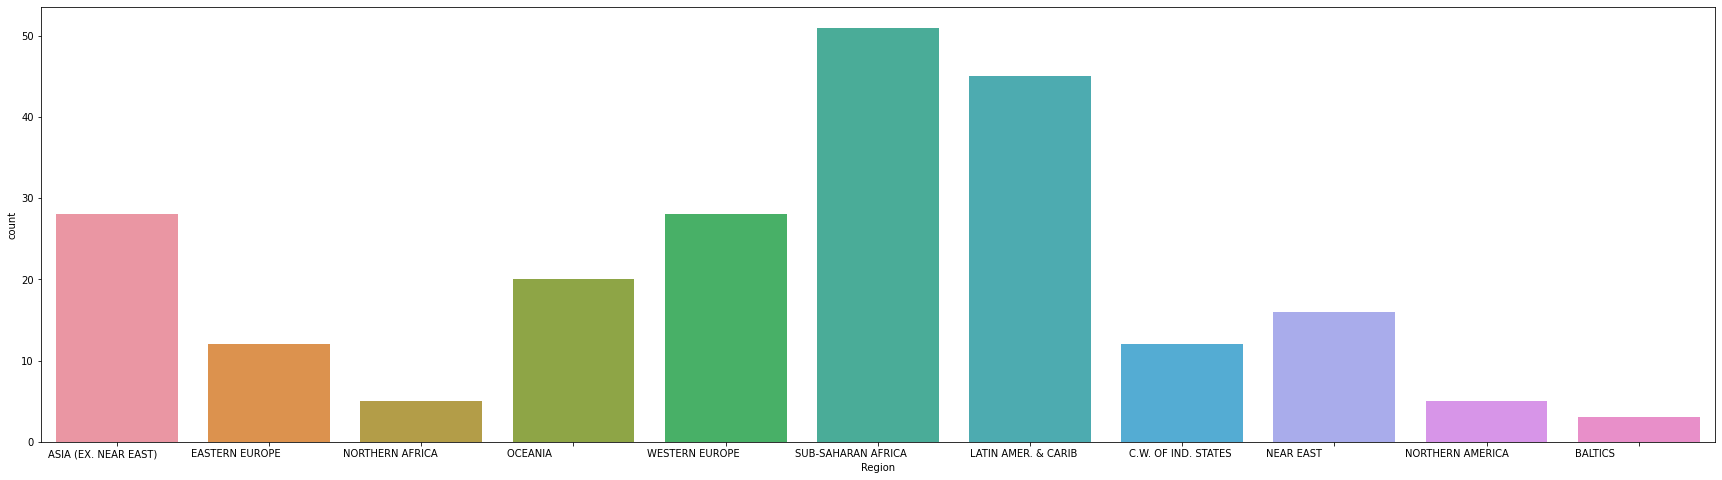

In [105]:
# Let's start with the Region col

plt.figure(figsize=(30,8))
sns.countplot(df_copy['Region'])
plt.show()


In [106]:
#conclusions

#1.sub saharan region has most countries
#2.balitics region has least countries 

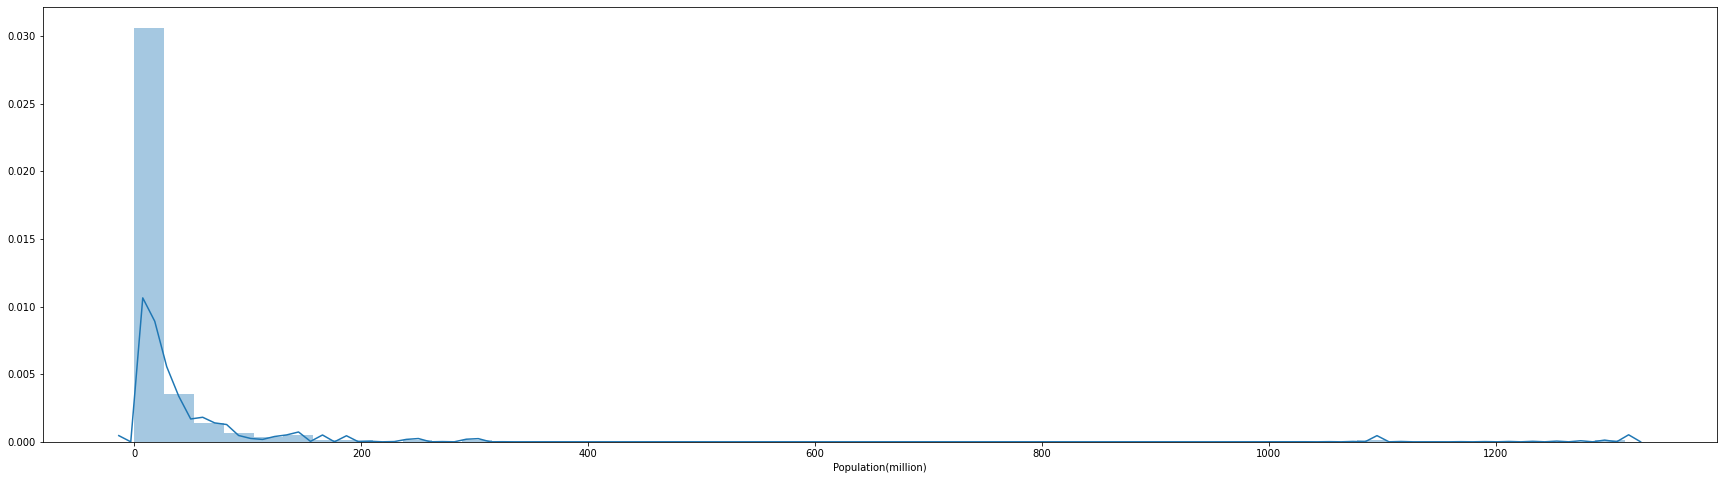

In [107]:
#for Population(million) column

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Population(million)'])
plt.show()

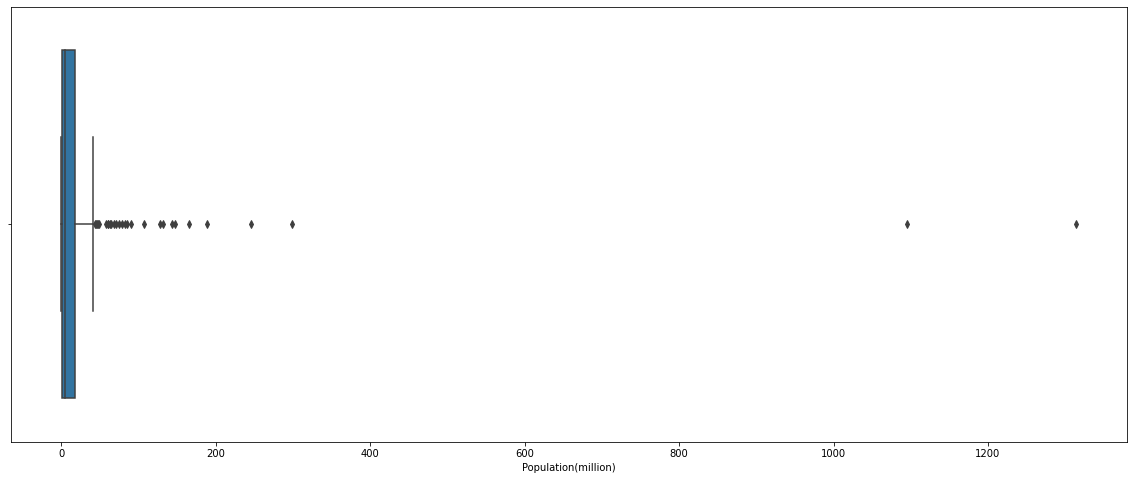

In [108]:
plt.figure(figsize=(20,8))
sns.boxplot(df_copy['Population(million)'])
plt.show()

In [109]:
df_copy[df_copy['Population(million)']>1000]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
42,China,ASIA (EX. NEAR EAST),1313.97,9596960.0,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.4,1.25,83.35,13.25,6.97,12.5,47.3,40.3
94,India,ASIA (EX. NEAR EAST),1095.35,3287590.0,333.2,0.21,-0.07,56.29,2900.0,59.5,45.4,54.4,2.74,42.86,22.01,8.18,18.6,27.6,53.8


In [110]:
#Conclusion
#0. graph is left skewed
#1. China and India are outliers
#2. The dropping of the rows may not be a good idea because they hold real and valid data 
#3. But this can hamper mathematical calculations, hence replacing the outliers populations with std of population 

#as the data is based on real world we should not hamper it hence will create another column to keep manipulated data 

In [111]:
round(df_copy['Population(million)'].std(),2)

118.39

In [112]:
#df_copy['Population(million)_M']=df_copy['Population(million)'].copy()

In [113]:
#replacing with std to get better mathematical data
#but again as the data is real rinning the code below is not recommended 
#df_copy['Population(million)_M'].loc[[42,94]]=round(df_copy['Population(million)'].std(),2)

In [114]:
#changing the population will also hamper the population density 
#re-calculating population density for india and china 
#but again as the data is real rinning the code below is not recommended 

In [115]:
#df_copy['Pop. Density (per sq. mi.)_M']=df_copy['Pop. Density (per sq. mi.)'].copy()

In [116]:
#df_copy['Pop. Density (per sq. mi.)_M'].loc[[42,94]]=round((df_copy['Population(million)_M']*1000000)/df_copy['Area (sq. mi.)'],2)

In [117]:
#df_copy.loc[42]

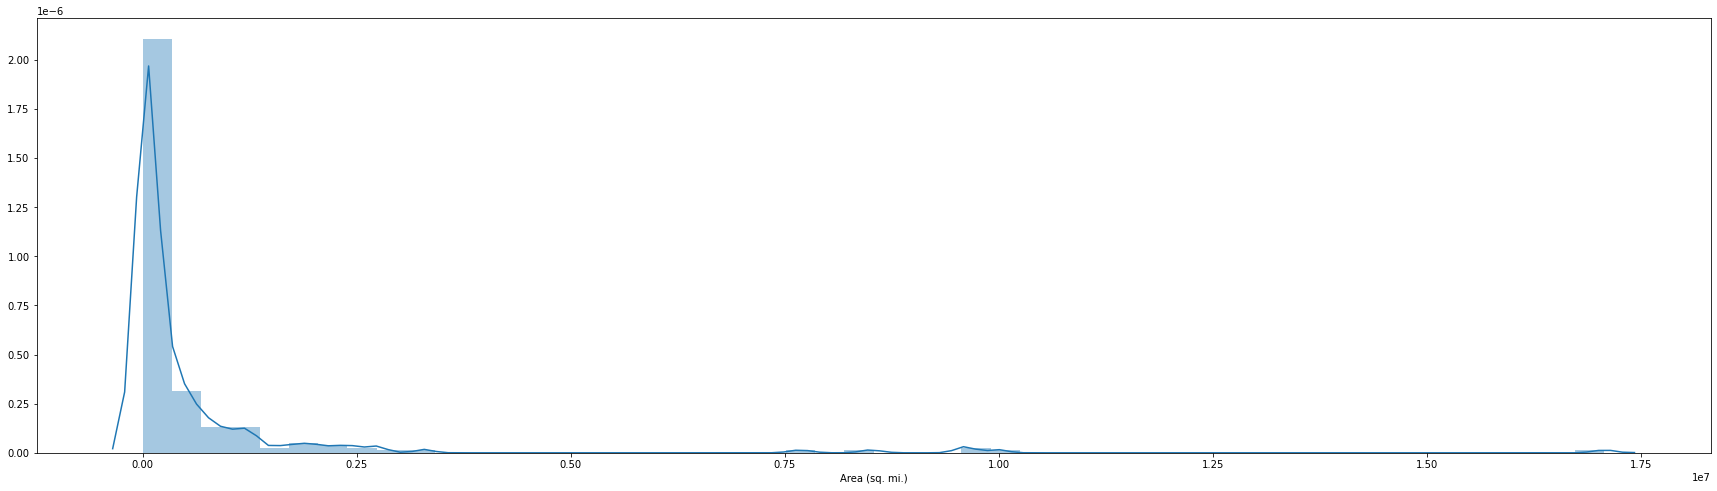

In [118]:
#for Area (sq. mi.) column

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Area (sq. mi.)'])
plt.show()

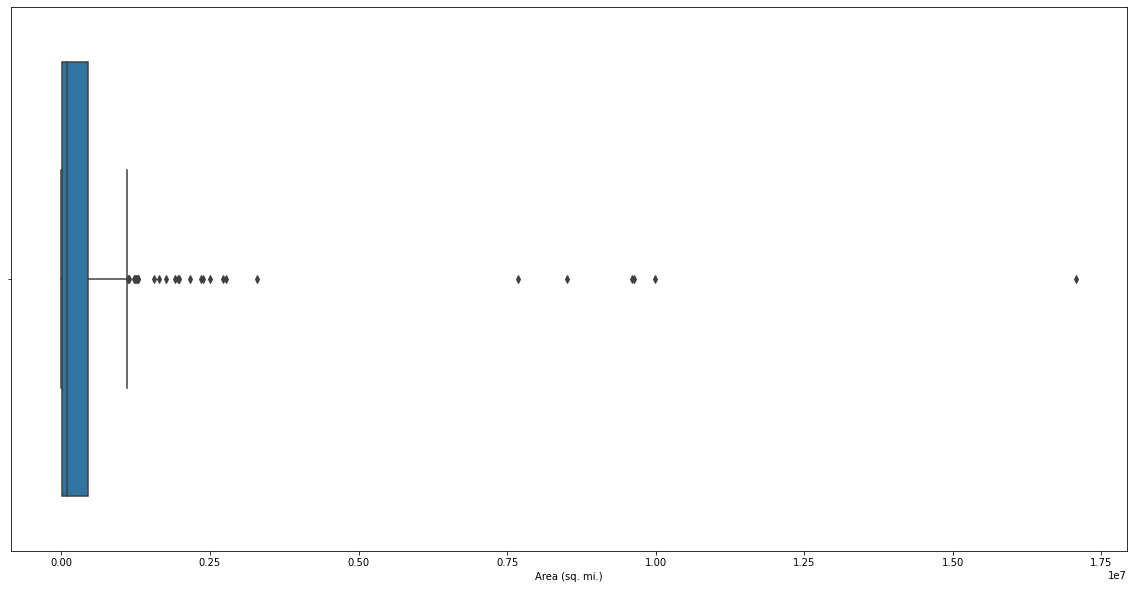

In [119]:
plt.figure(figsize=(20,10))
sns.boxplot(df_copy['Area (sq. mi.)'])
plt.show()

In [120]:
df_copy[df_copy['Area (sq. mi.)']>10000000]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
169,Russia,C.W. OF IND. STATES,142.89,17075200.0,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,9.95,14.65,5.4,37.1,57.5


In [121]:
#Conclusions

#1. graph is left skewed
#2. Russia is outlier, it has a big area
#3. The dropping of the row may not be a good idea because it hold real and valid data 
#4. But this can hamper mathematical calculations, hence replacing the outliers Area(sq. mi.) with std of Area (sq. mi.)

# therefore will be creating another column named Area (sq. mi.)_M which will contain the manipulated data for better mathematical operations and will not hamper the original data

In [122]:
round(df_copy['Area (sq. mi.)'].std(),2)

1797671.12

In [123]:
#but again as the data is real rinning the code below is not recommended 

#df_copy['Area (sq. mi.)_M']=df_copy['Area (sq. mi.)'].copy()
#df_copy['Area (sq. mi.)_M'].loc[169]=round(df_copy['Area (sq. mi.)'].std(),2)

In [124]:
#hence recalculating the population density of Russia
#but again as the data is real rinning the code below is not recommended 

#df_copy['Pop. Density (per sq. mi.)_M'].loc[169]=round((df_copy['Population(million)_M'].loc[169]*1000000)/df_copy['Area (sq. mi.)_M'].loc[169],2)

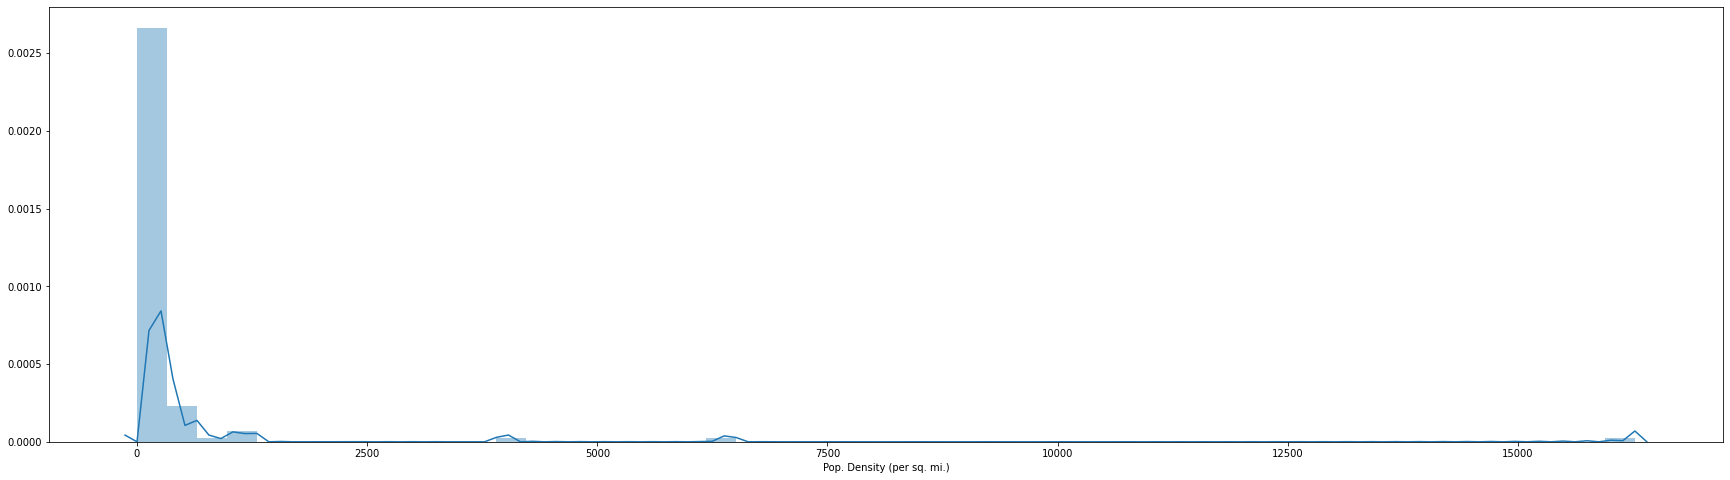

In [125]:
#for Pop. Density (per sq. mi.) col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Pop. Density (per sq. mi.)'])
plt.show()

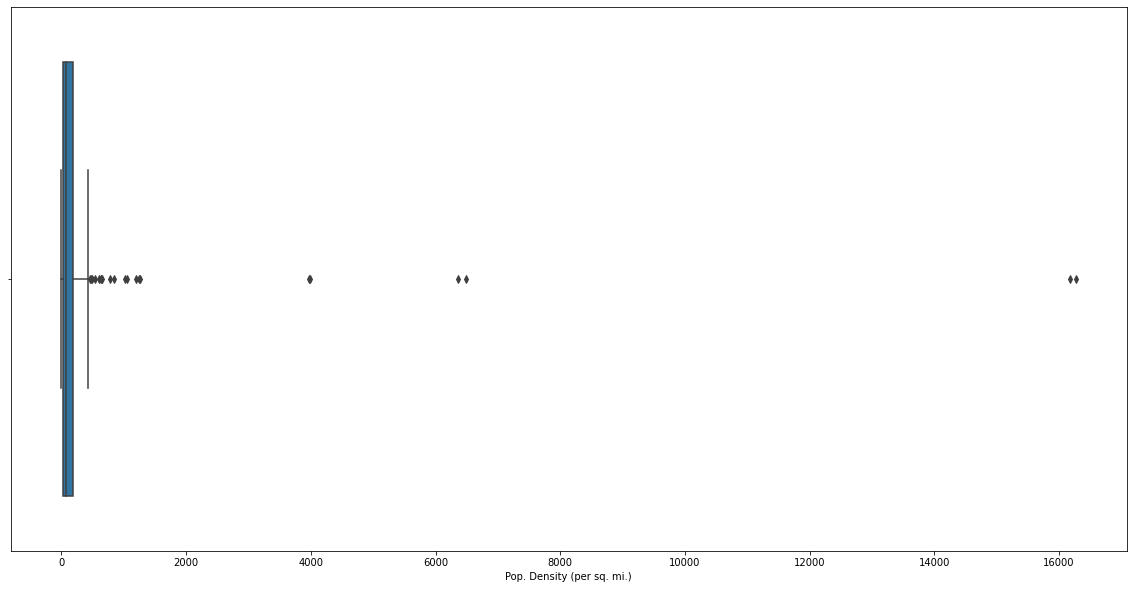

In [126]:
plt.figure(figsize=(20,10))
sns.boxplot(df_copy['Pop. Density (per sq. mi.)'])
plt.show()

In [127]:
df_copy[df_copy['Pop. Density (per sq. mi.)']>6000]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
91,Hong Kong,ASIA (EX. NEAR EAST),6.94,1092.0,6355.7,67.12,5.24,2.97,28800.0,93.5,546.7,5.05,1.01,93.94,7.29,6.29,0.1,9.2,90.60
122,Macau,ASIA (EX. NEAR EAST),0.45,28.0,16183.0,146.43,4.86,4.39,19400.0,94.5,384.9,0.00,0.00,100.00,8.48,4.47,0.1,7.2,92.70
138,Monaco,WESTERN EUROPE,0.03,2.0,16271.5,205.00,7.75,5.43,27000.0,99.0,1035.6,0.00,0.00,100.00,9.19,12.91,17.0,30.7,54.22
184,Singapore,ASIA (EX. NEAR EAST),4.49,693.0,6482.2,27.85,11.53,2.29,23700.0,92.5,411.4,1.64,0.00,98.36,9.34,4.28,0.0,33.9,66.10


In [128]:
#Conclusions 

#1. Nothing can be done
#2. Hong Kong, Macau, Monaco, Singapore has high population density

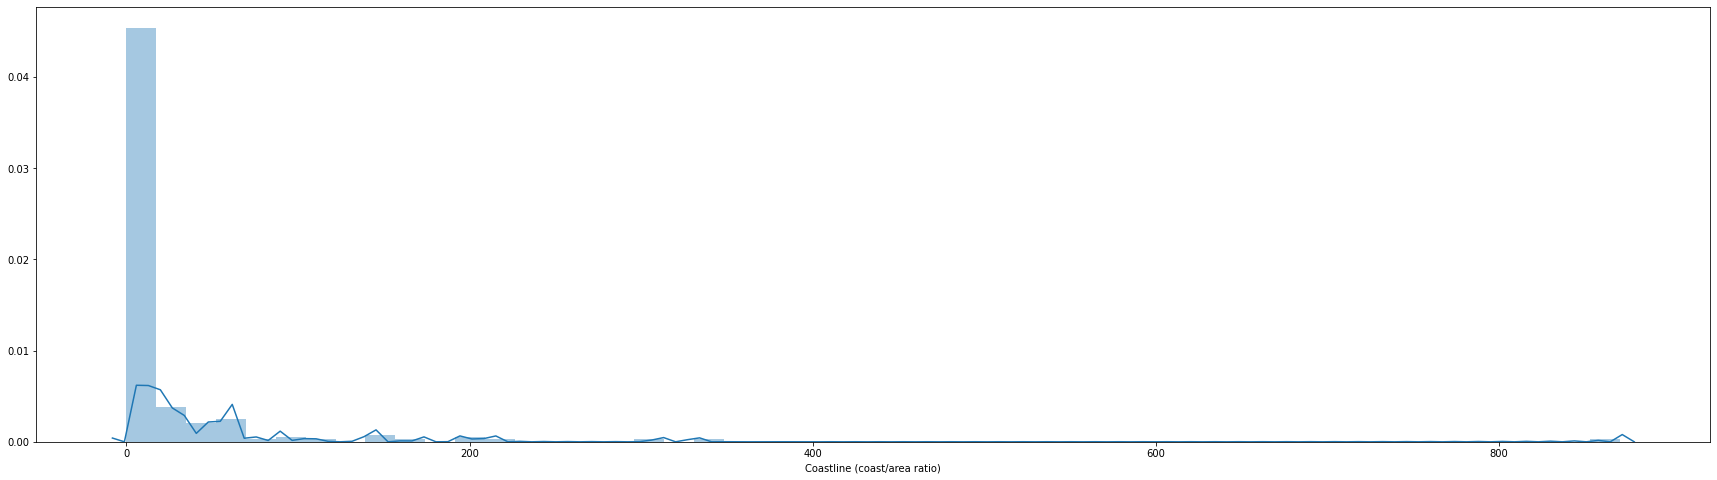

In [129]:
#for Coastline (coast/area ratio) column 

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Coastline (coast/area ratio)'])
plt.show()

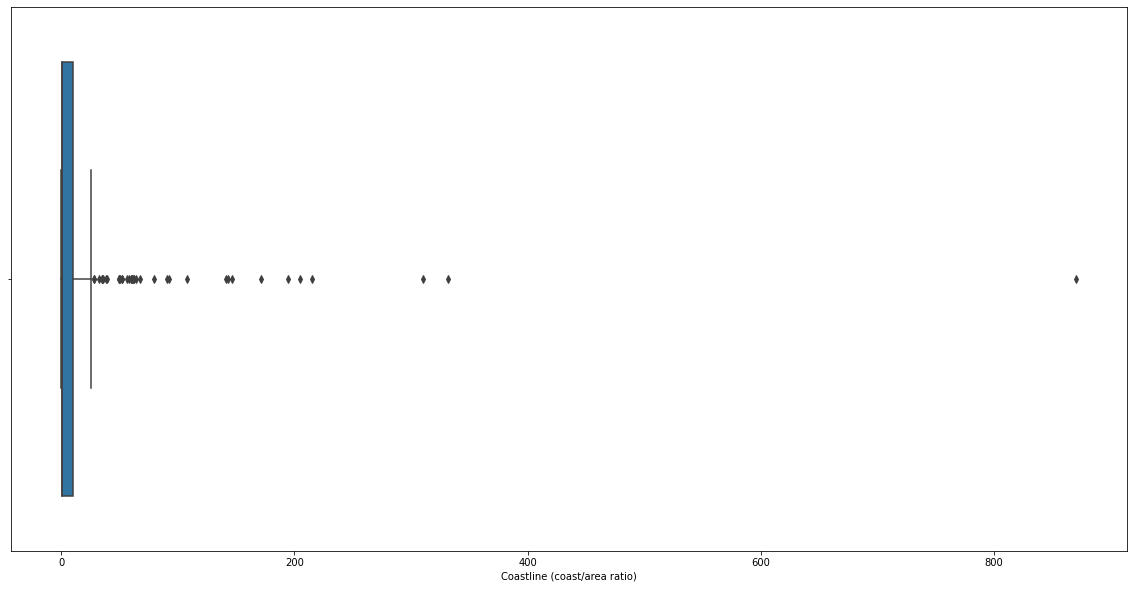

In [130]:
plt.figure(figsize=(20,10))
sns.boxplot(df_copy['Coastline (coast/area ratio)'])
plt.show()

In [131]:
df_copy[df_copy['Coastline (coast/area ratio)']>800]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
136,"Micronesia, Fed. St.",OCEANIA,0.11,702.0,153.9,870.66,-20.99,30.21,2000.0,89.0,114.8,5.71,45.71,48.58,24.68,4.75,28.9,15.2,55.9


In [132]:
#replacing with std for better mathematical calculations 
#but again as the data is real rinning the code below is not recommended 

#df_copy['Coastline (coast/area ratio)'].loc[136]=round(df_copy['Coastline (coast/area ratio)'].std(),2)#

In [133]:
#Conclusion

#1. Micronesia, Fed. St. has a big coastline

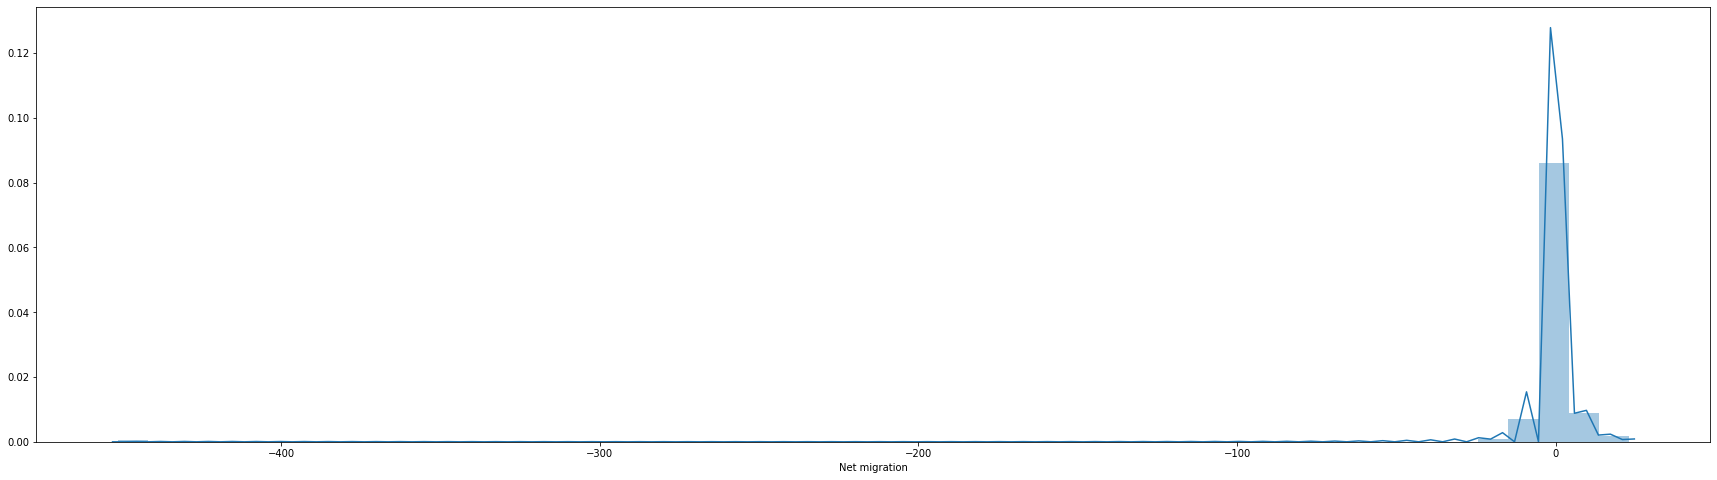

In [134]:
#for Net migration col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Net migration'])
plt.show()

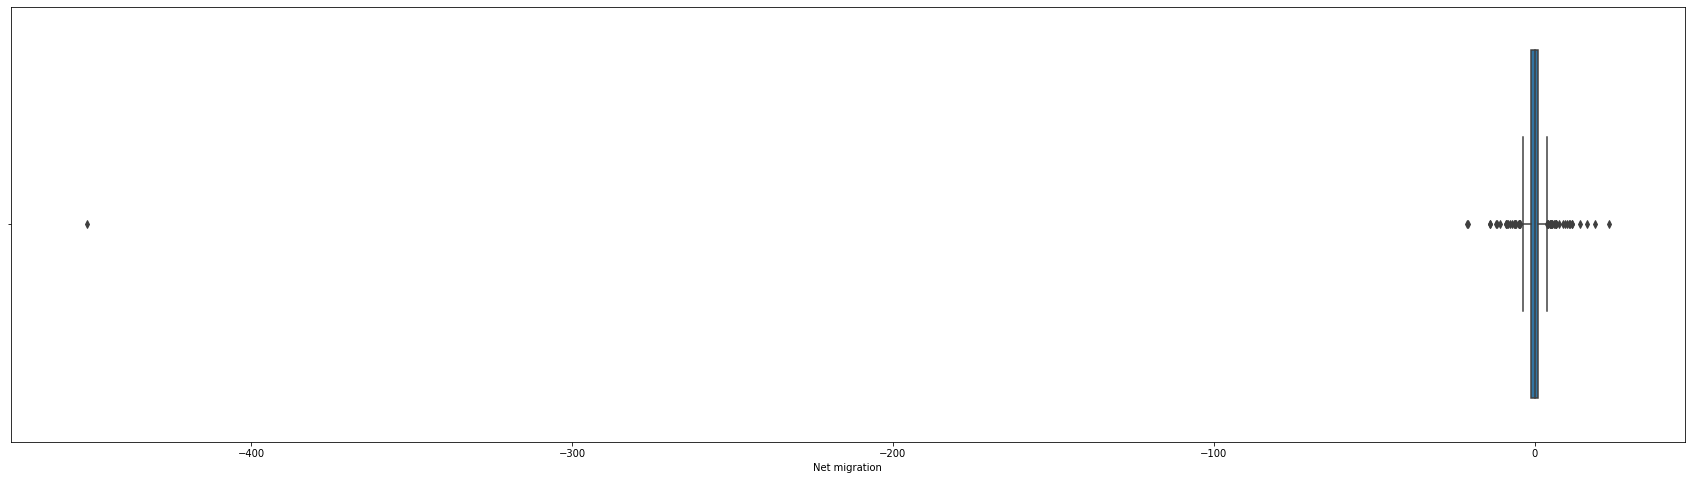

In [135]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['Net migration'])
plt.show()

In [136]:
df_copy[df_copy['Net migration']<-400]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
47,Cook Islands,OCEANIA,0.02,240.0,89.1,50.0,-451.2868,12.6,5000.0,95.0,289.9,17.39,13.04,69.57,21.0,14.8,15.1,9.6,75.3


In [137]:
#replacing with std for better mathematical calculations 
#but again as the data is real rinning the code below is not recommended 

#df_copy['Net migration'].loc[47]=round(df_copy['Net migration'].std(),2) 



In [138]:
#Conclusion

#1. Cook Islands has high Net Migration rate 

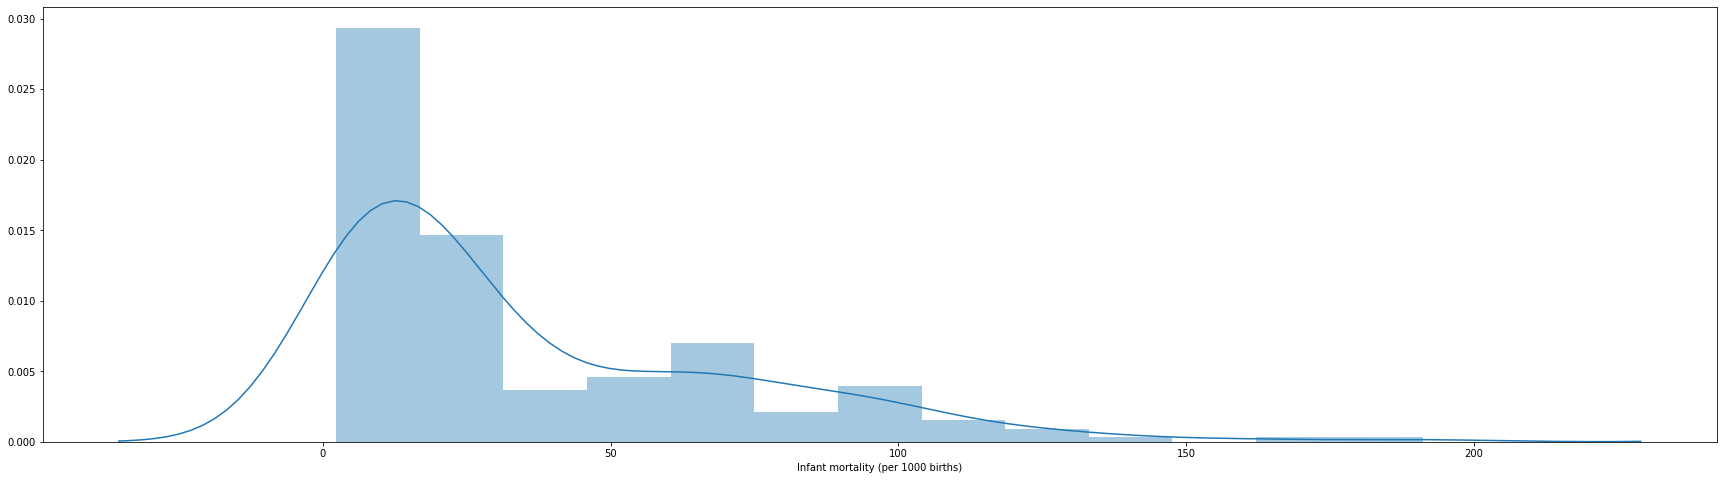

In [139]:
# for Infant mortality (per 1000 births) col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Infant mortality (per 1000 births)'])
plt.show()

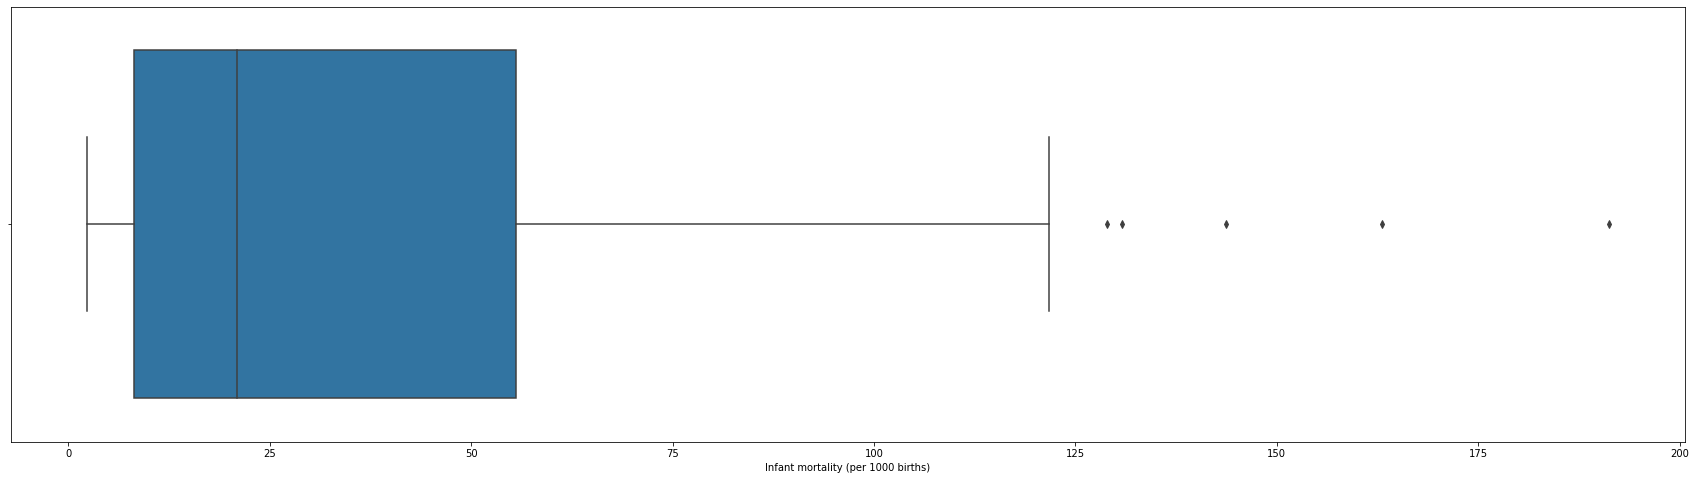

In [140]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['Infant mortality (per 1000 births)'])
plt.show()

In [141]:
df_copy[df_copy['Infant mortality (per 1000 births)']>150]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
0,Afghanistan,ASIA (EX. NEAR EAST),31.06,647500.0,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,46.60,20.34,38.0,24.0,38.0
5,Angola,SUB-SAHARAN AFRICA,12.13,1246700.0,9.7,0.13,0.00,191.19,1900.0,42.0,7.8,2.41,0.24,97.35,45.11,24.20,9.6,65.8,24.6


In [142]:
#Conclusion 

#1.  Afghanistan, Angola has high Infant mortality (per 1000 births)

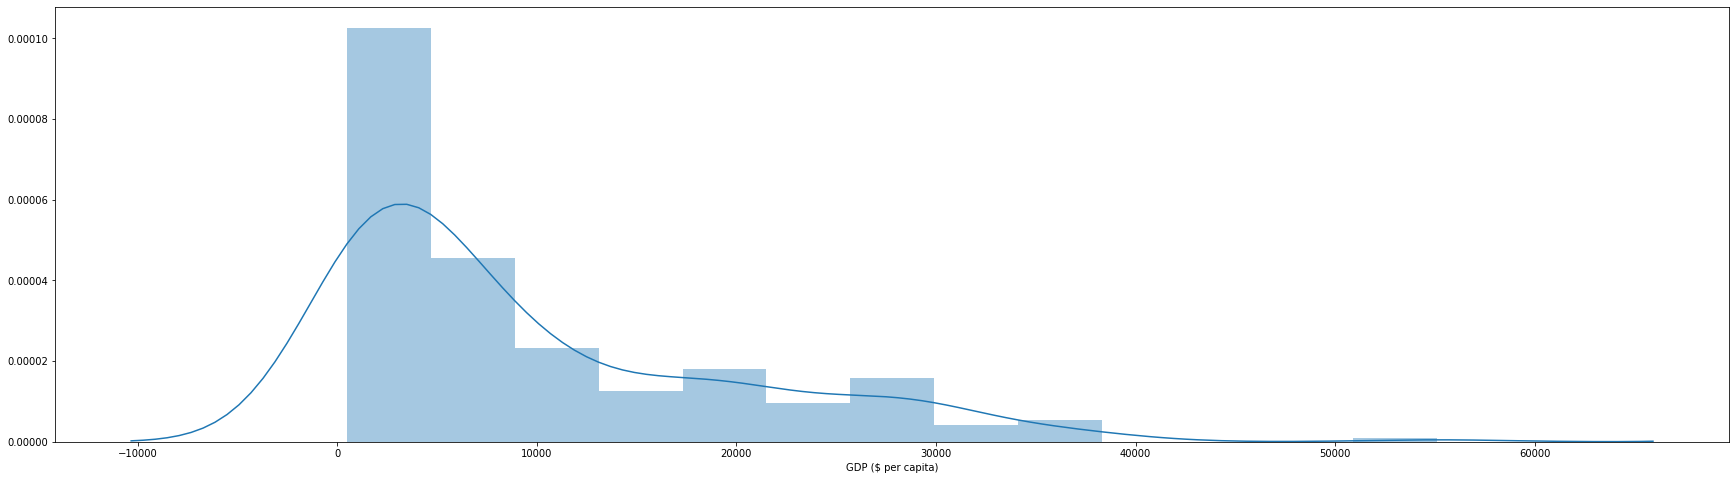

In [143]:
# for GDP ($ per capita) col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['GDP ($ per capita)'])
plt.show()

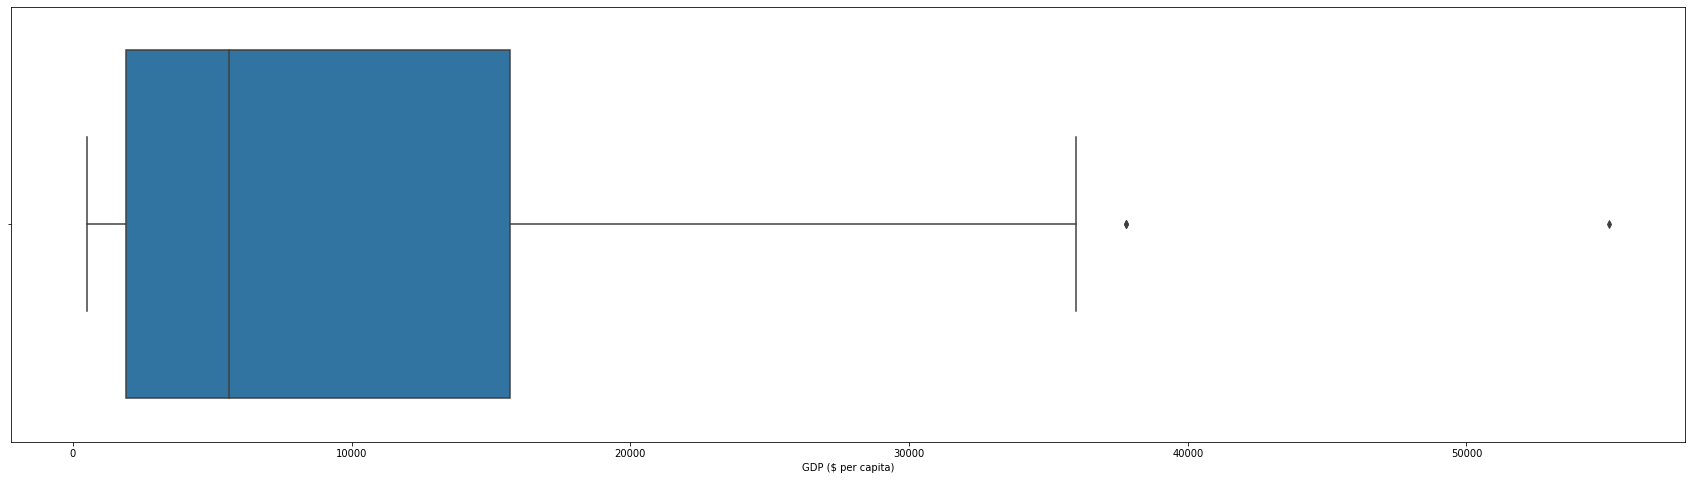

In [144]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['GDP ($ per capita)'])
plt.show()

In [145]:
df_copy[df_copy['GDP ($ per capita)']>40000]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
121,Luxembourg,WESTERN EUROPE,0.47,2586.0,183.5,0.0,8.97,4.81,55100.0,100.0,515.4,23.28,0.4,76.32,11.94,8.41,1.0,13.0,86.0


In [146]:
#Conclusion 

#1. Luxembourg is an outlier, clearly it has a very high gdp but can hamper mathematical calcutions

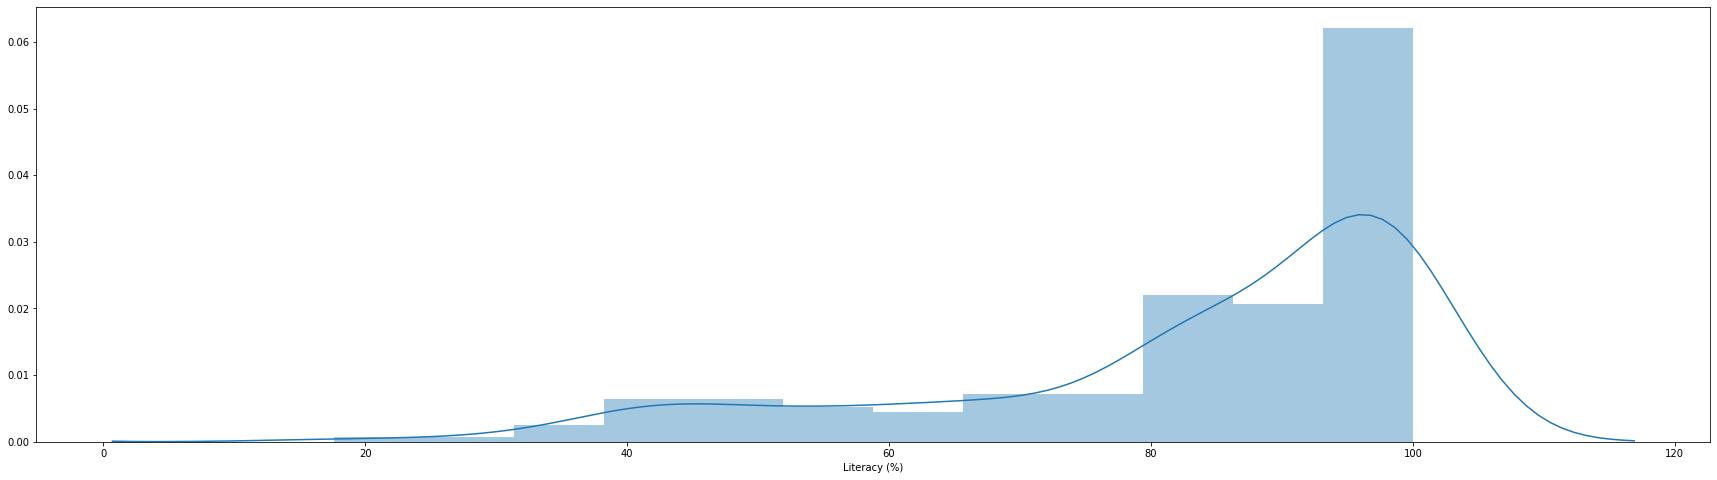

In [147]:
# for Literacy (%) col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Literacy (%)'])
plt.show()

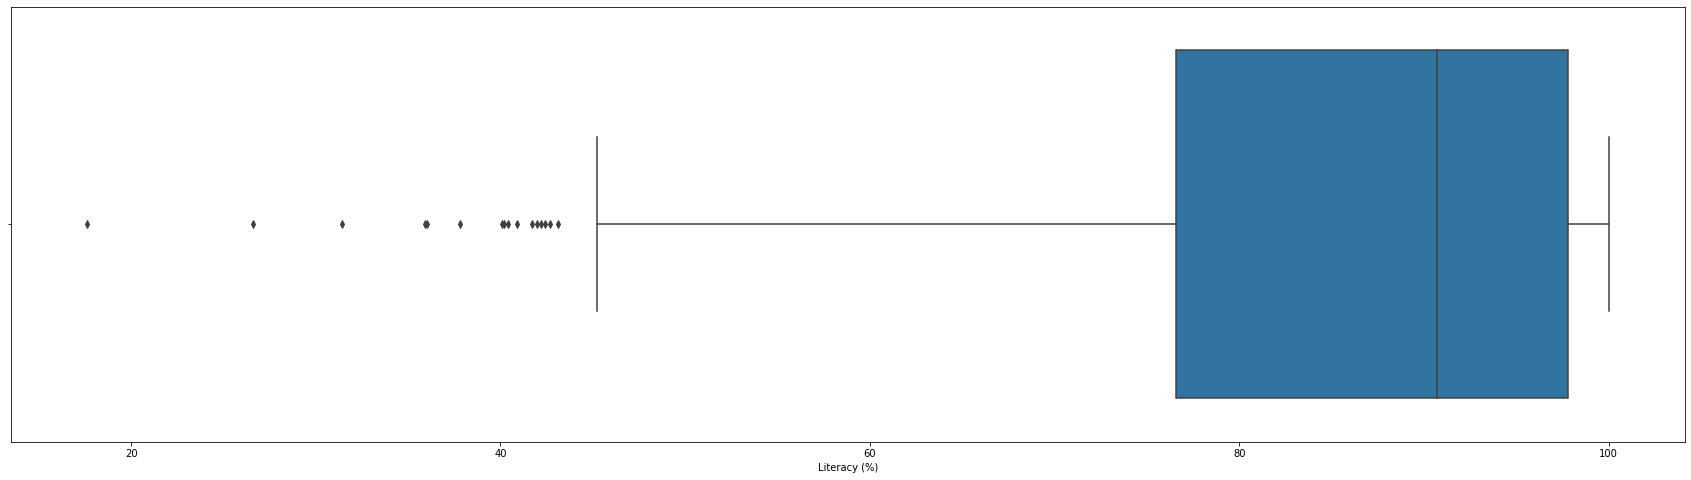

In [148]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['Literacy (%)'])
plt.show()

In [149]:
df_copy[df_copy['Literacy (%)']<40]['Country'].tolist()

['Afghanistan', 'Burkina Faso', 'Guinea', 'Niger', 'Sierra Leone', 'Somalia']

In [150]:
#Conclusion

#1. ['Afghanistan', 'Burkina Faso', 'Guinea', 'Niger', 'Sierra Leone', 'Somalia'] - countries has a very low literary(%)

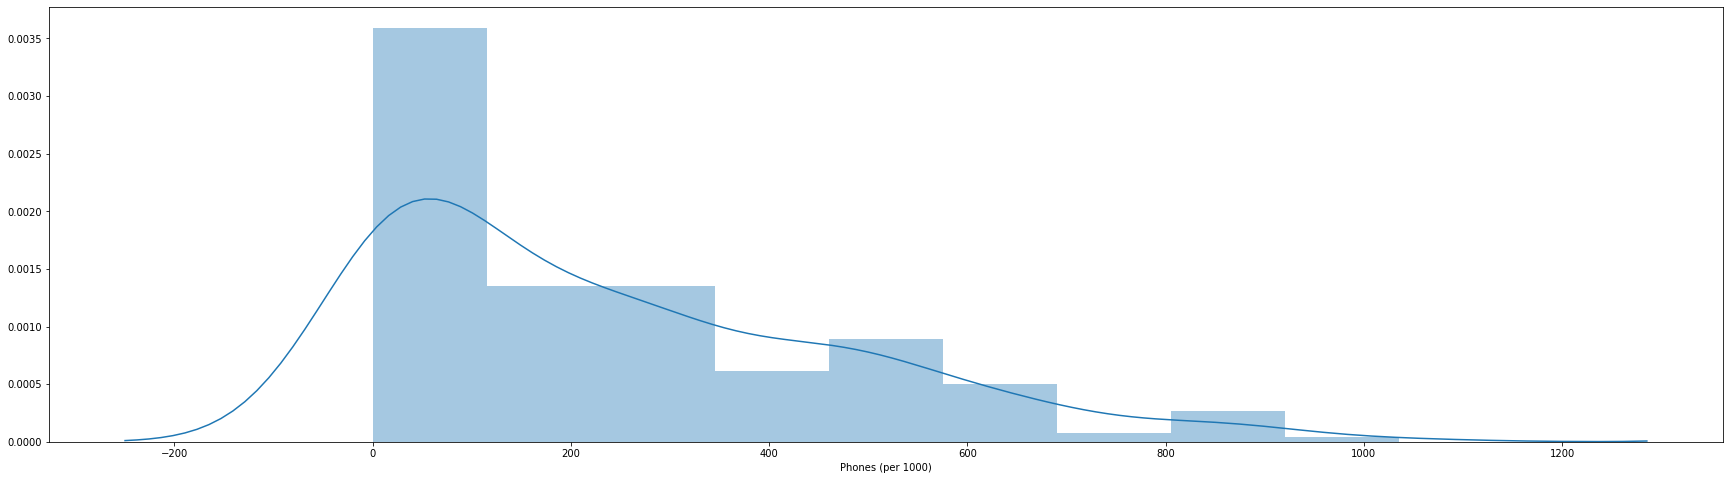

In [151]:
# for Phones (per 1000) col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Phones (per 1000)'])
plt.show()

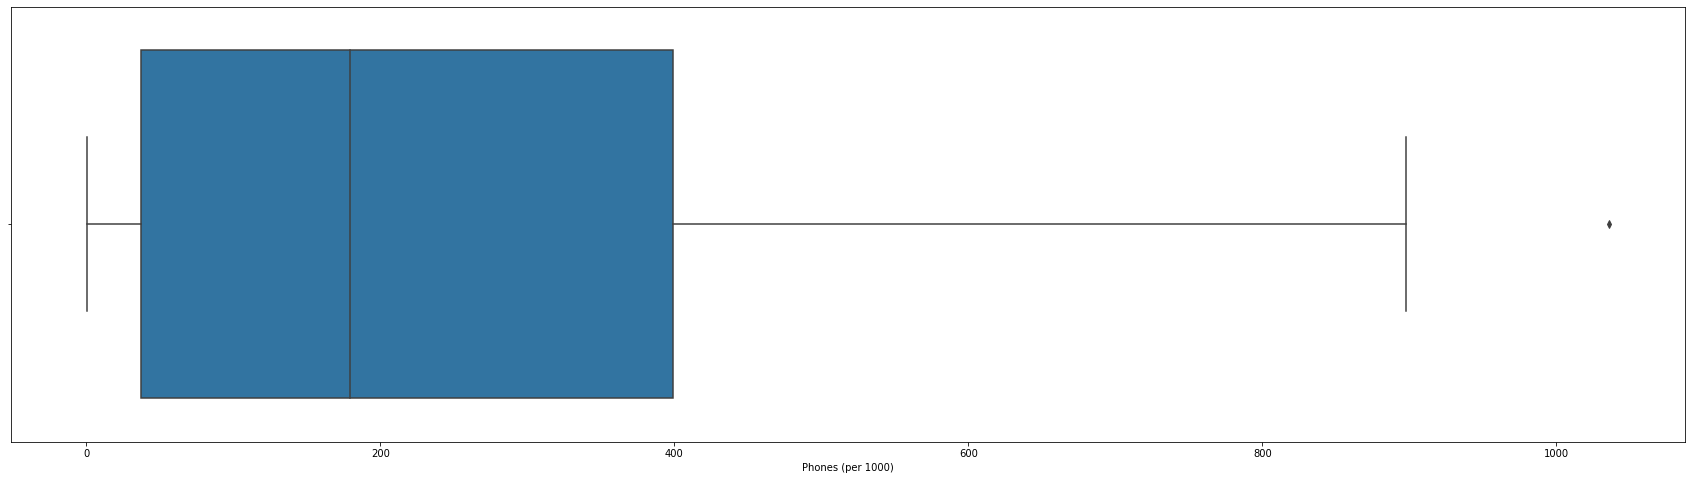

In [152]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['Phones (per 1000)'])
plt.show()

In [153]:
df_copy[df_copy['Phones (per 1000)']>900]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
138,Monaco,WESTERN EUROPE,0.03,2.0,16271.5,205.0,7.75,5.43,27000.0,99.0,1035.6,0.0,0.0,100.0,9.19,12.91,17.0,30.7,54.22


In [154]:
#Conclusion 

#1. In Monaco the usage of phone is very high

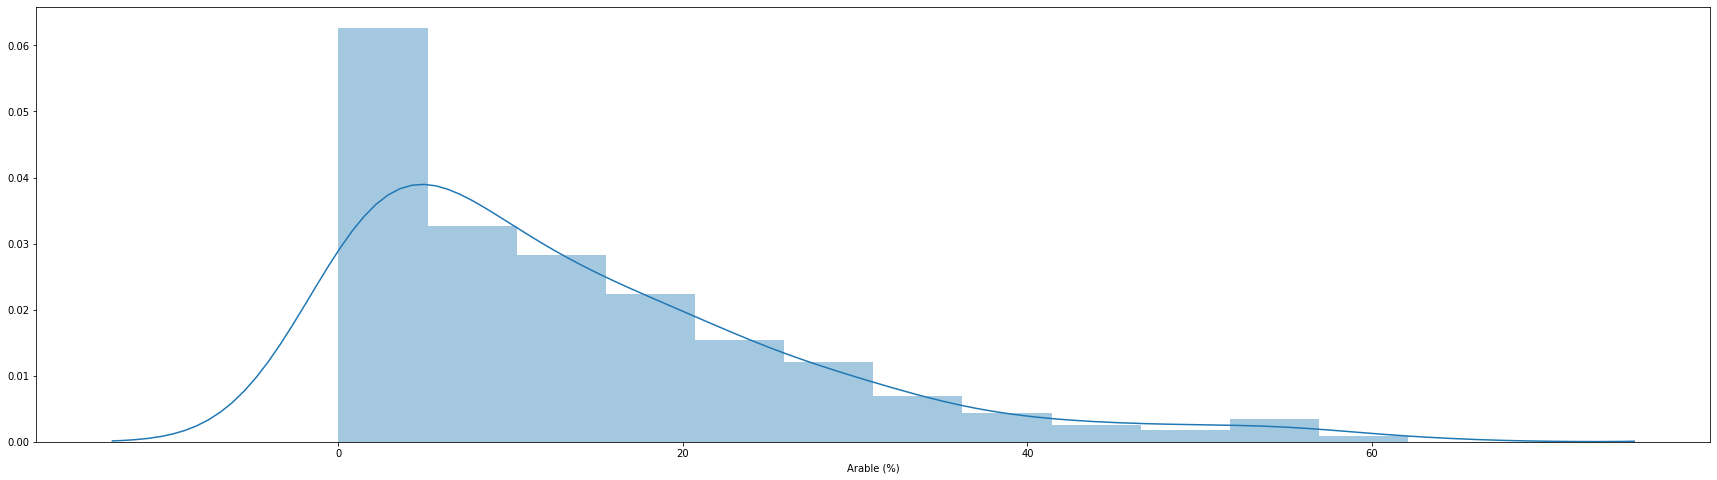

In [155]:
# for Arable (%) col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Arable (%)'])
plt.show()

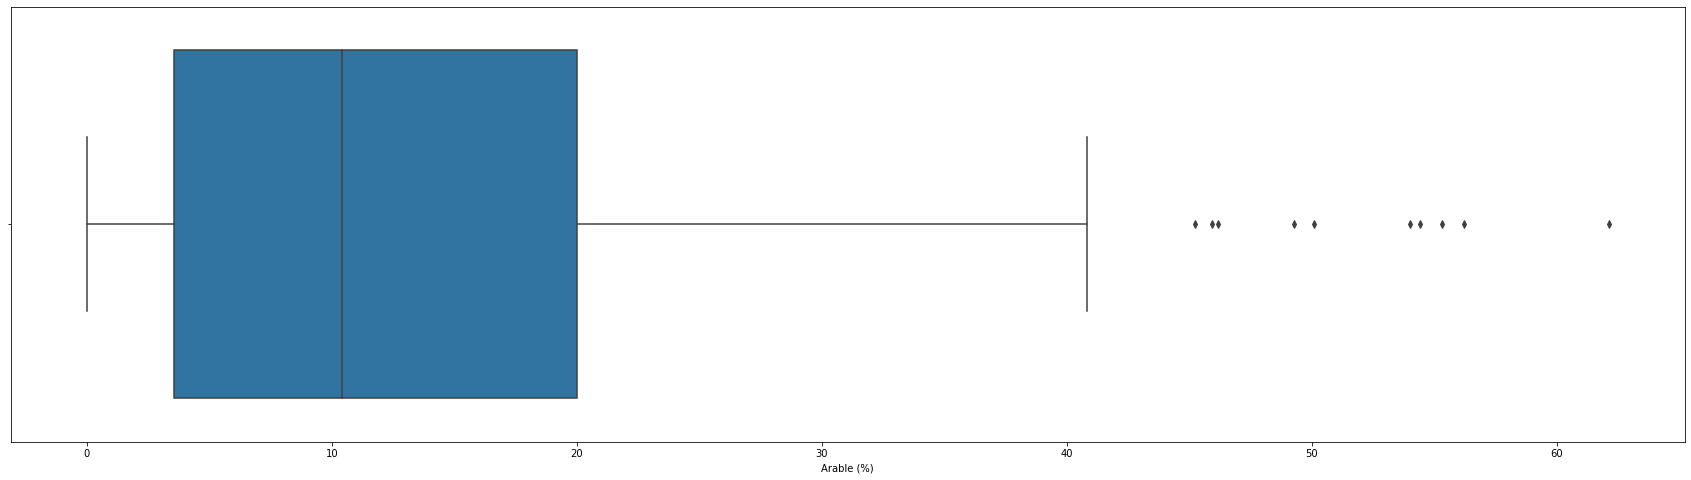

In [156]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['Arable (%)'])
plt.show()

In [157]:
df_copy[df_copy['Arable (%)']>50]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
16,Bangladesh,ASIA (EX. NEAR EAST),147.37,144000.0,1023.4,0.40,-0.71,62.60,1900.0,43.1,7.3,62.11,3.07,34.82,29.80,8.27,19.9,19.8,60.3
54,Denmark,WESTERN EUROPE,5.45,43094.0,126.5,16.97,2.48,4.56,31100.0,100.0,614.6,54.02,0.19,45.79,11.13,10.36,1.8,24.6,73.5
92,Hungary,EASTERN EUROPE,9.98,93030.0,107.3,0.00,0.86,8.57,13900.0,99.4,336.2,50.09,2.06,47.85,9.72,13.11,3.7,31.2,65.1
94,India,ASIA (EX. NEAR EAST),1095.35,3287590.0,333.2,0.21,-0.07,56.29,2900.0,59.5,45.4,54.40,2.74,42.86,22.01,8.18,18.6,27.6,53.8
137,Moldova,C.W. OF IND. STATES,4.47,33843.0,132.0,0.00,-0.26,40.42,1800.0,99.1,208.1,55.30,10.79,33.91,15.70,12.64,21.3,23.3,55.5
211,Ukraine,C.W. OF IND. STATES,46.71,603700.0,77.4,0.46,-0.39,20.34,5400.0,99.7,259.9,56.21,1.61,42.18,8.82,14.39,18.7,45.2,36.1


In [158]:
df_copy[df_copy['Arable (%)']>50]['Country'].tolist()

['Bangladesh', 'Denmark', 'Hungary', 'India', 'Moldova', 'Ukraine']

In [159]:
#Conclusion

#1. ['Bangladesh', 'Denmark', 'Hungary', 'India', 'Moldova', 'Ukraine'] - these countries has a high Arable (%)

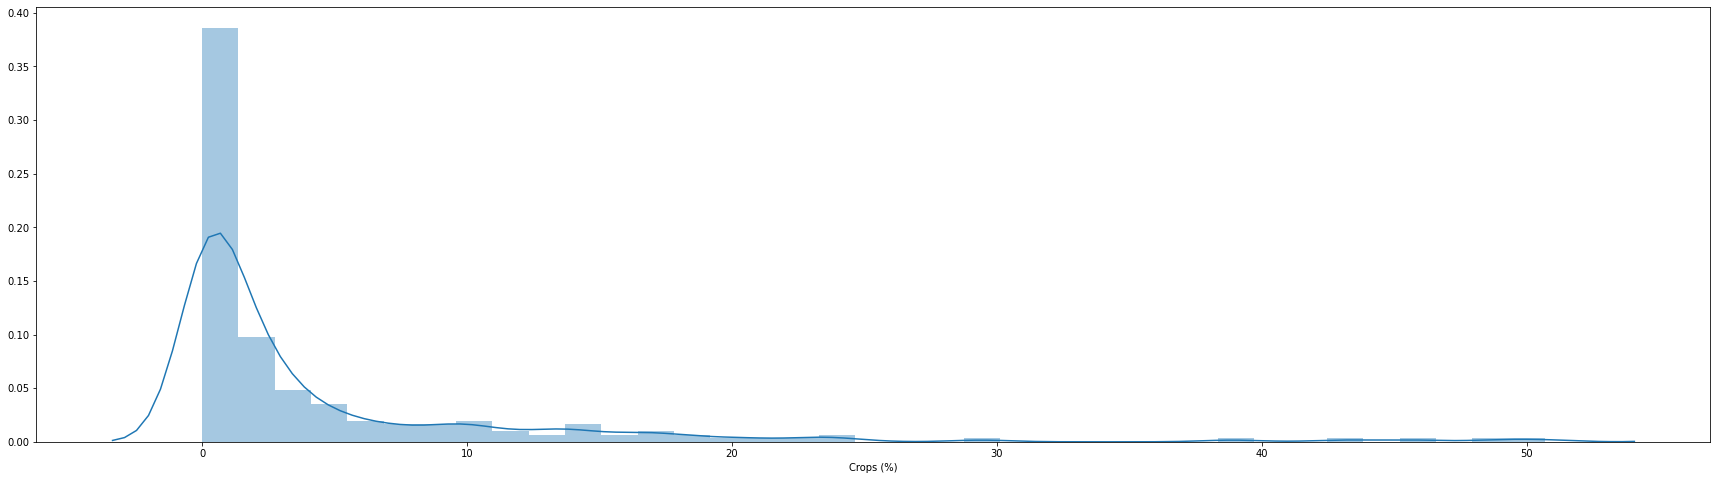

In [160]:
# for Crops (%) col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Crops (%)'])
plt.show()

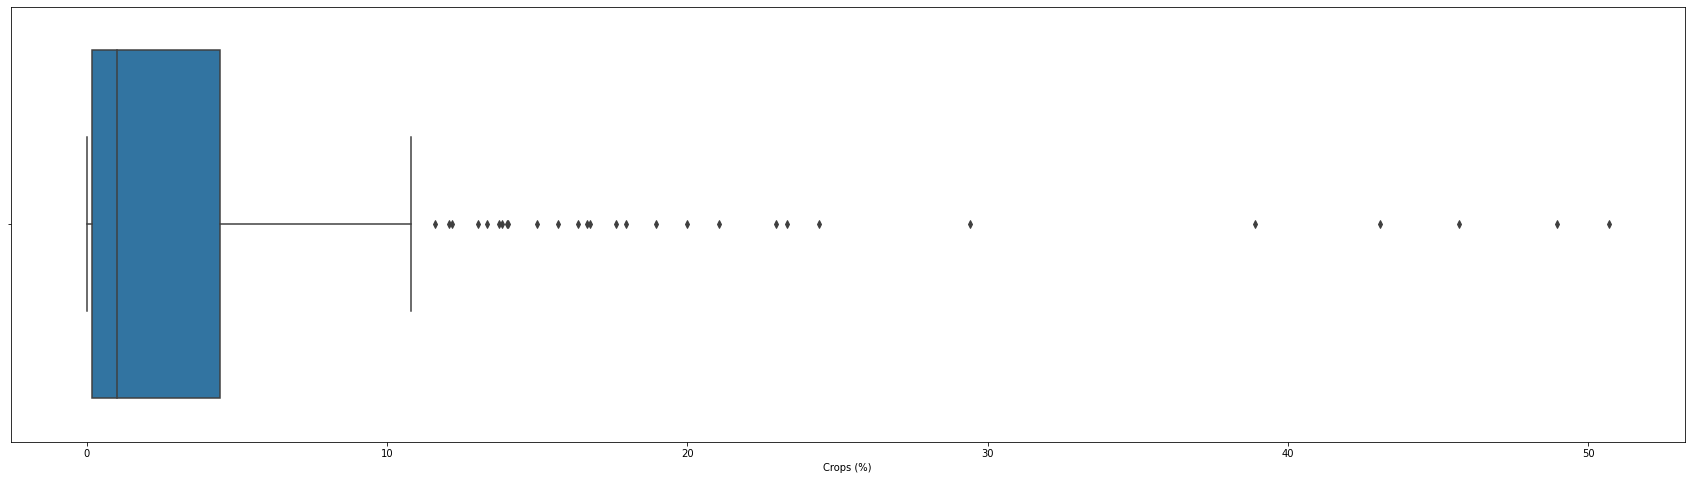

In [161]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['Crops (%)'])
plt.show()

In [162]:
df_copy[df_copy['Crops (%)']>30]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
108,Kiribati,OCEANIA,0.11,811.0,130.0,140.94,0.00,48.52,800.0,83.0,42.7,2.74,50.68,46.58,30.65,8.26,8.9,24.2,66.8
130,Marshall Islands,OCEANIA,0.06,11854.0,5.1,3.12,-6.04,29.45,1600.0,93.7,91.2,16.67,38.89,44.44,33.05,4.78,31.7,14.9,53.4
136,"Micronesia, Fed. St.",OCEANIA,0.11,702.0,153.9,870.66,-20.99,30.21,2000.0,89.0,114.8,5.71,45.71,48.58,24.68,4.75,28.9,15.2,55.9
178,Sao Tome & Principe,SUB-SAHARAN AFRICA,0.19,1001.0,193.2,20.88,-2.72,43.11,1200.0,79.3,36.2,6.25,48.96,44.79,40.25,6.47,16.7,14.8,68.4
203,Tonga,OCEANIA,0.11,748.0,153.3,56.02,0.00,12.62,2200.0,98.5,97.7,23.61,43.06,33.33,25.37,5.28,23.0,27.0,50.0


In [163]:
df_copy[df_copy['Crops (%)']>30]['Country'].tolist()

['Kiribati',
 'Marshall Islands',
 'Micronesia, Fed. St.',
 'Sao Tome & Principe',
 'Tonga']

In [164]:
#Conclusion

#1. ['Kiribati', 'Marshall Islands', 'Micronesia, Fed. St.', 'Sao Tome & Principe', 'Tonga'] - these countries has a high Crops(%)

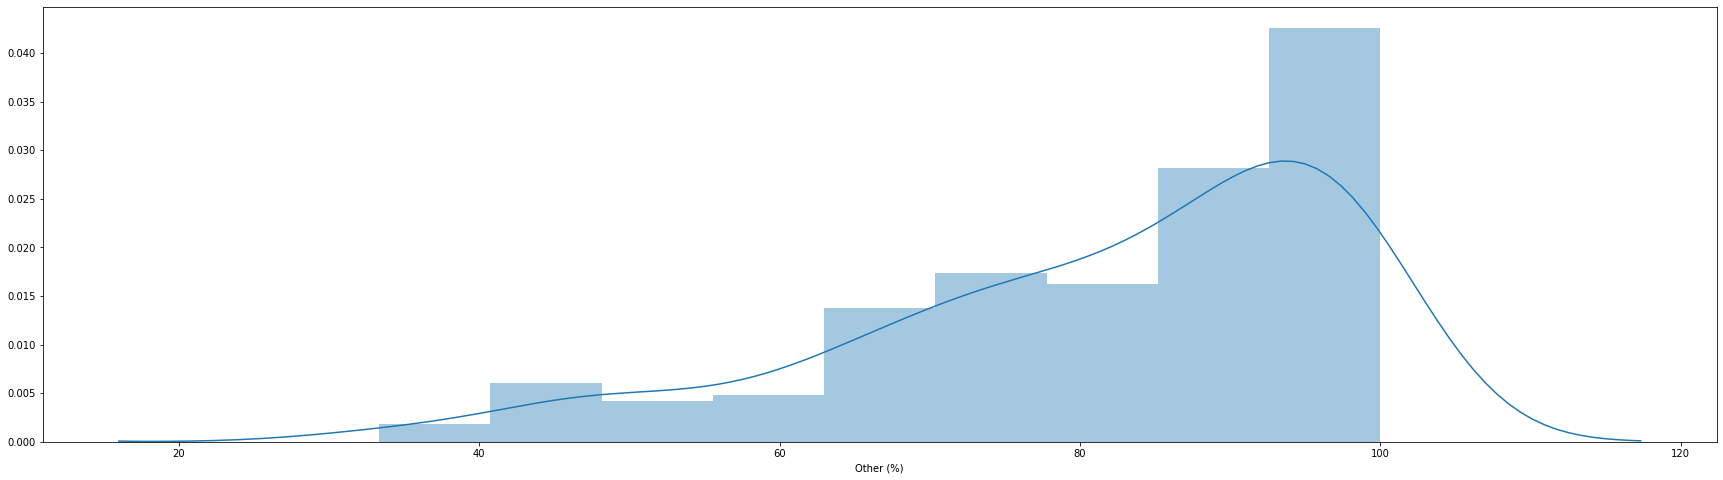

In [165]:
# for Other (%) col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Other (%)'])
plt.show()

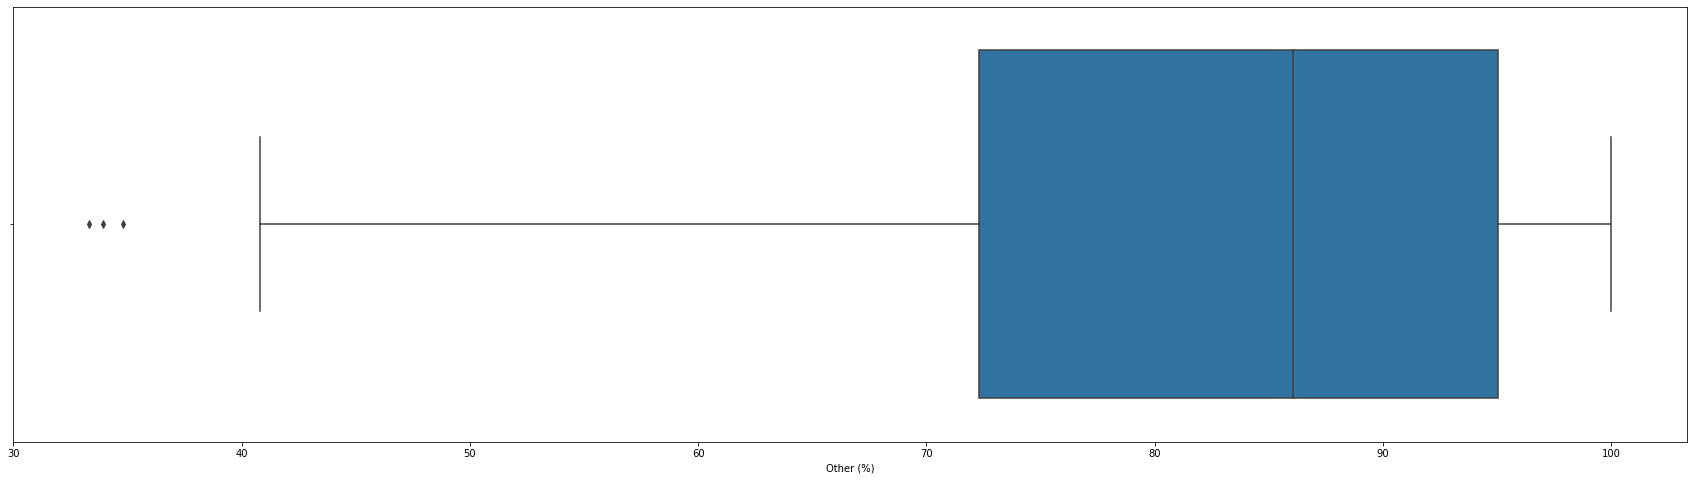

In [166]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['Other (%)'])
plt.show()

In [167]:
df_copy[df_copy['Other (%)']<40]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
16,Bangladesh,ASIA (EX. NEAR EAST),147.37,144000.0,1023.4,0.40,-0.71,62.60,1900.0,43.1,7.3,62.11,3.07,34.82,29.80,8.27,19.9,19.8,60.3
137,Moldova,C.W. OF IND. STATES,4.47,33843.0,132.0,0.00,-0.26,40.42,1800.0,99.1,208.1,55.30,10.79,33.91,15.70,12.64,21.3,23.3,55.5
203,Tonga,OCEANIA,0.11,748.0,153.3,56.02,0.00,12.62,2200.0,98.5,97.7,23.61,43.06,33.33,25.37,5.28,23.0,27.0,50.0


In [168]:
#nothing to conclude as such

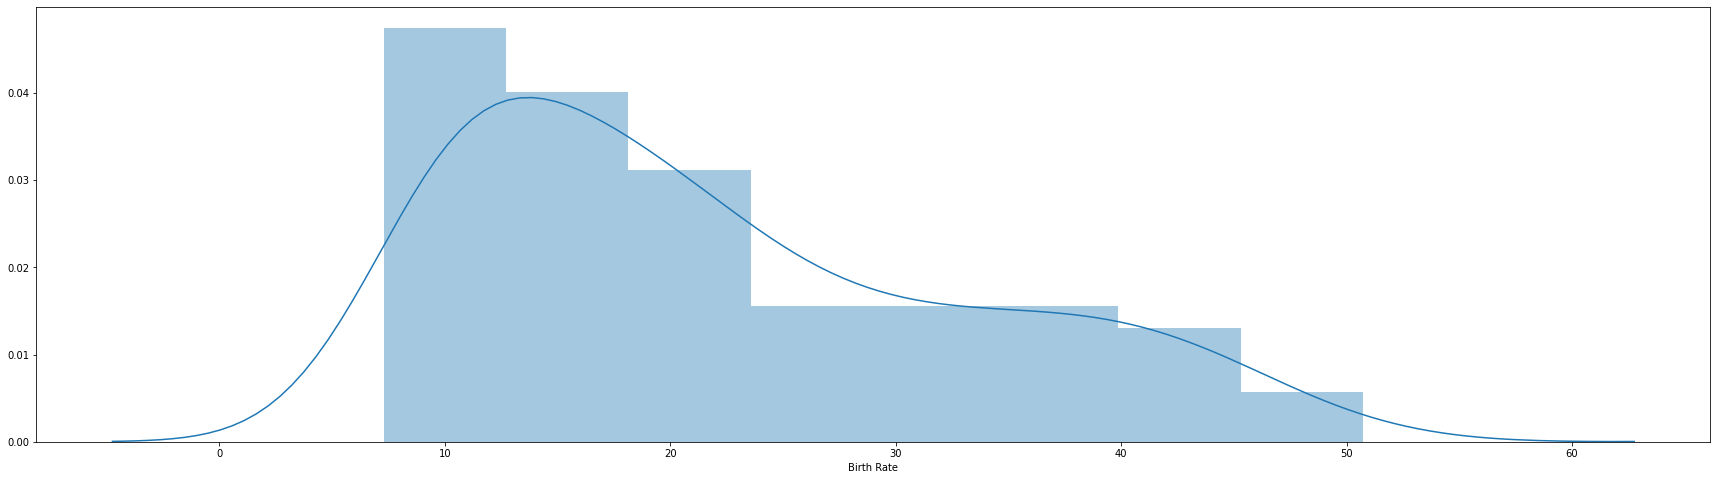

In [169]:
# for Birth Rate col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Birth Rate'])
plt.show()

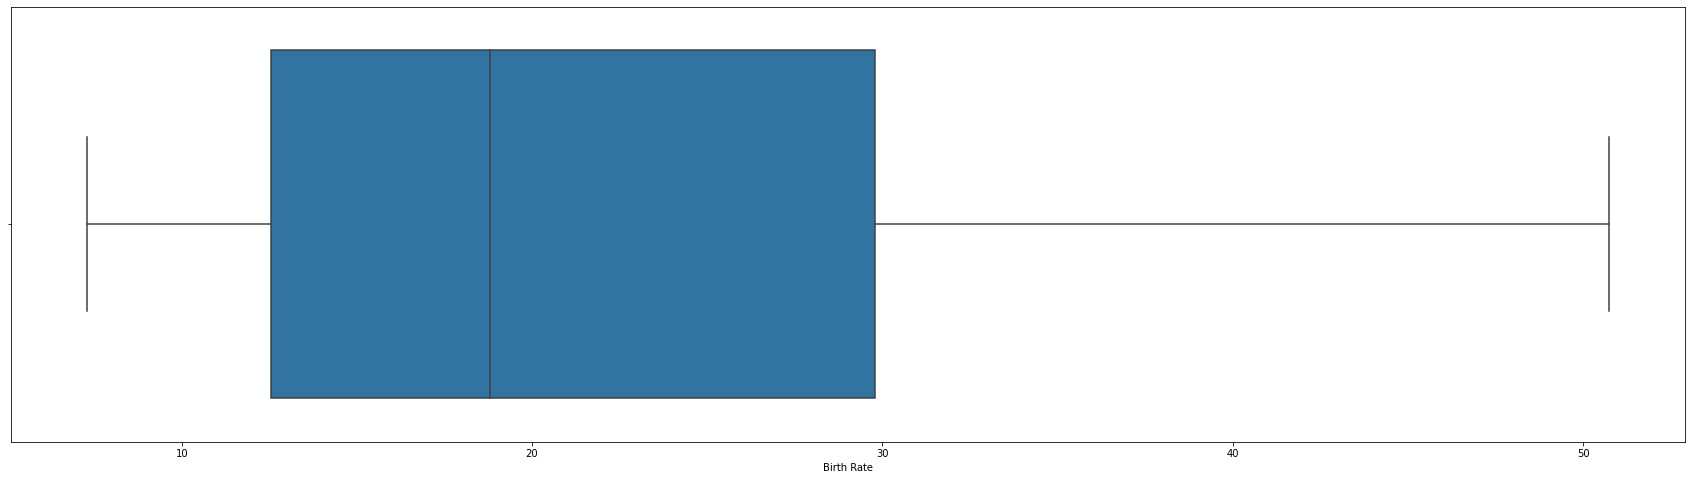

In [170]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['Birth Rate'])
plt.show()

In [171]:
#The data is good

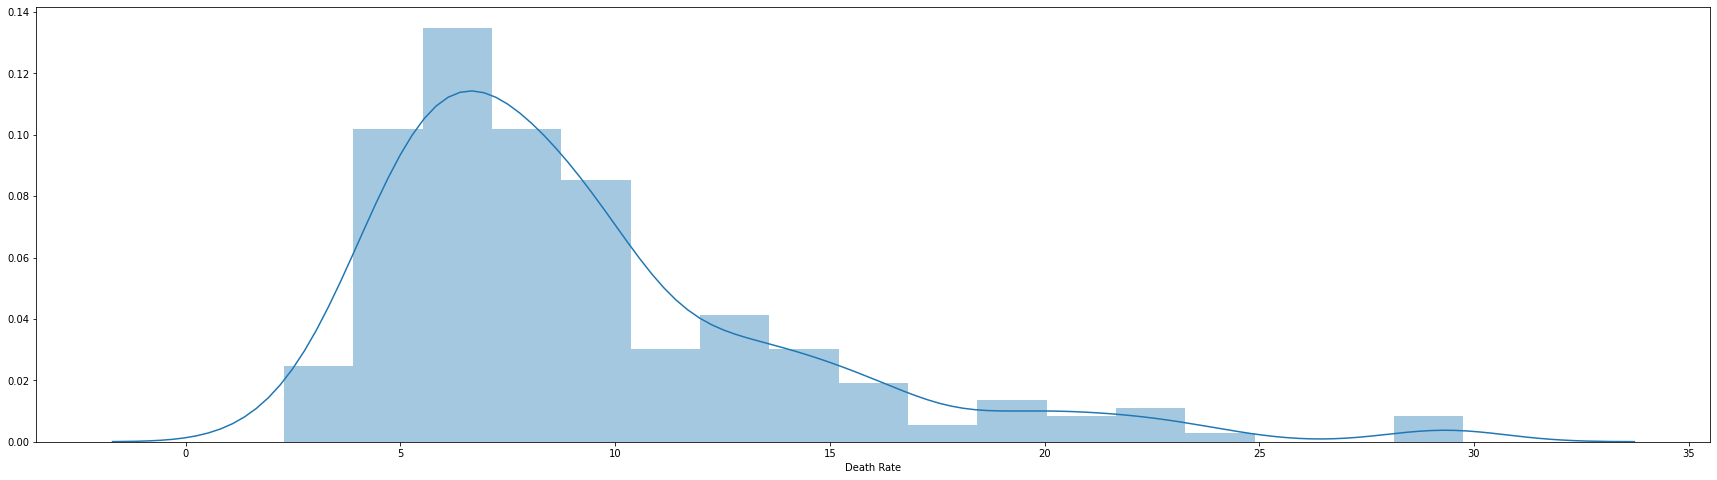

In [172]:
# for Death Rate col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Death Rate'])
plt.show()

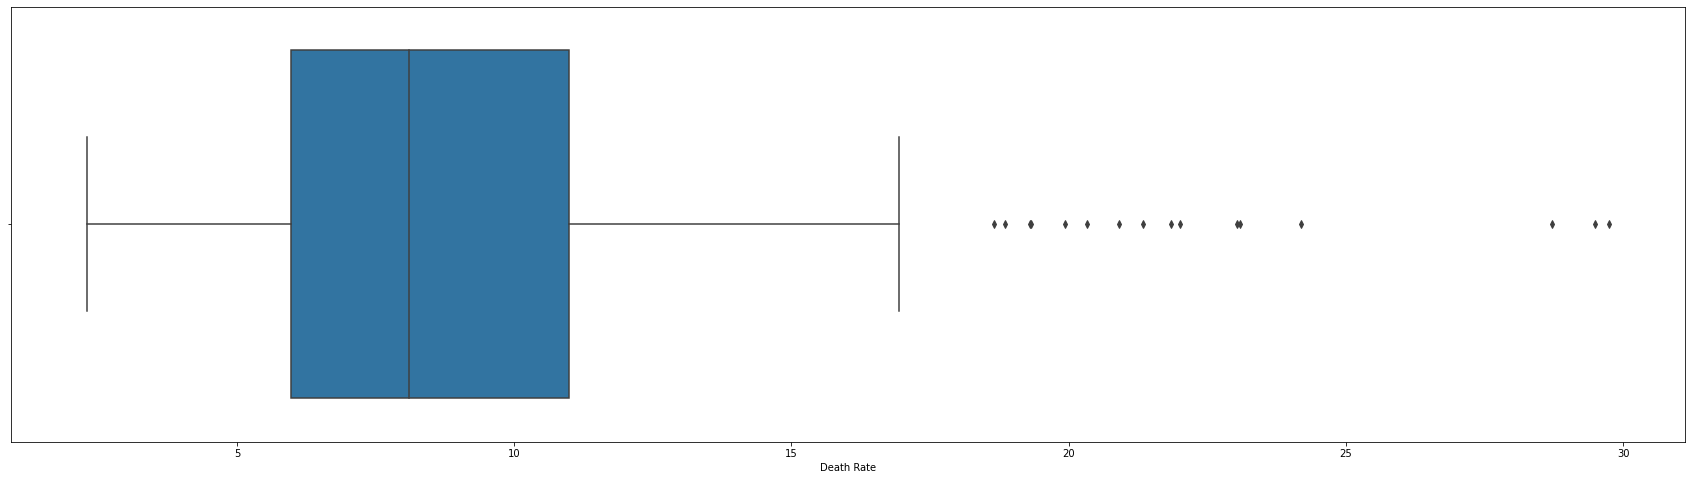

In [173]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['Death Rate'])
plt.show()

In [174]:
df_copy[df_copy['Death Rate']>25]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
26,Botswana,SUB-SAHARAN AFRICA,1.64,600370.0,2.7,0.0,0.00,54.58,9000.0,79.8,80.5,0.65,0.01,99.34,23.08,29.50,2.4,46.9,50.7
116,Lesotho,SUB-SAHARAN AFRICA,2.02,30355.0,66.6,0.0,-0.74,84.23,3000.0,84.8,23.7,10.87,0.13,89.00,24.75,28.71,16.3,44.3,39.4
194,Swaziland,SUB-SAHARAN AFRICA,1.14,17363.0,65.5,0.0,0.00,69.27,4900.0,81.6,30.8,10.35,0.70,88.95,27.41,29.74,11.9,51.5,36.6


In [175]:
df_copy[df_copy['Death Rate']>25]['Country'].tolist()

['Botswana', 'Lesotho', 'Swaziland']

In [176]:
#Conclusion

#1. ['Botswana', 'Lesotho', 'Swaziland'] these countries has a high death rate than others

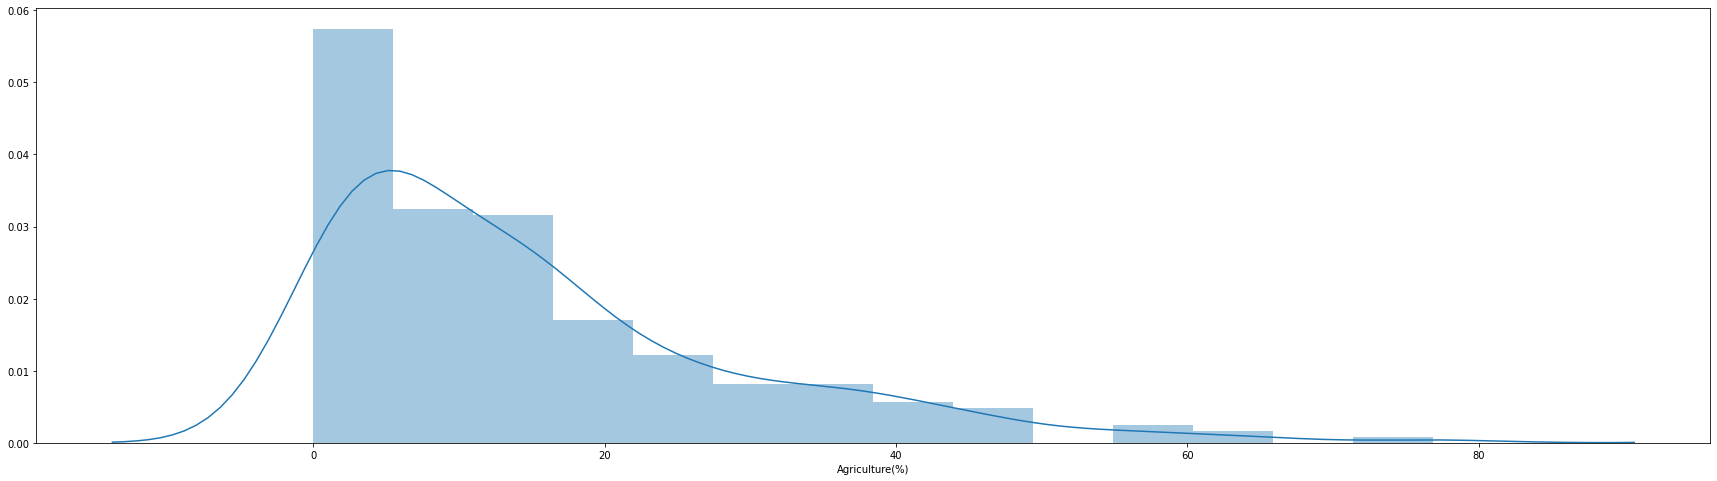

In [177]:
# for Agriculture(%) col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Agriculture(%)'])
plt.show()

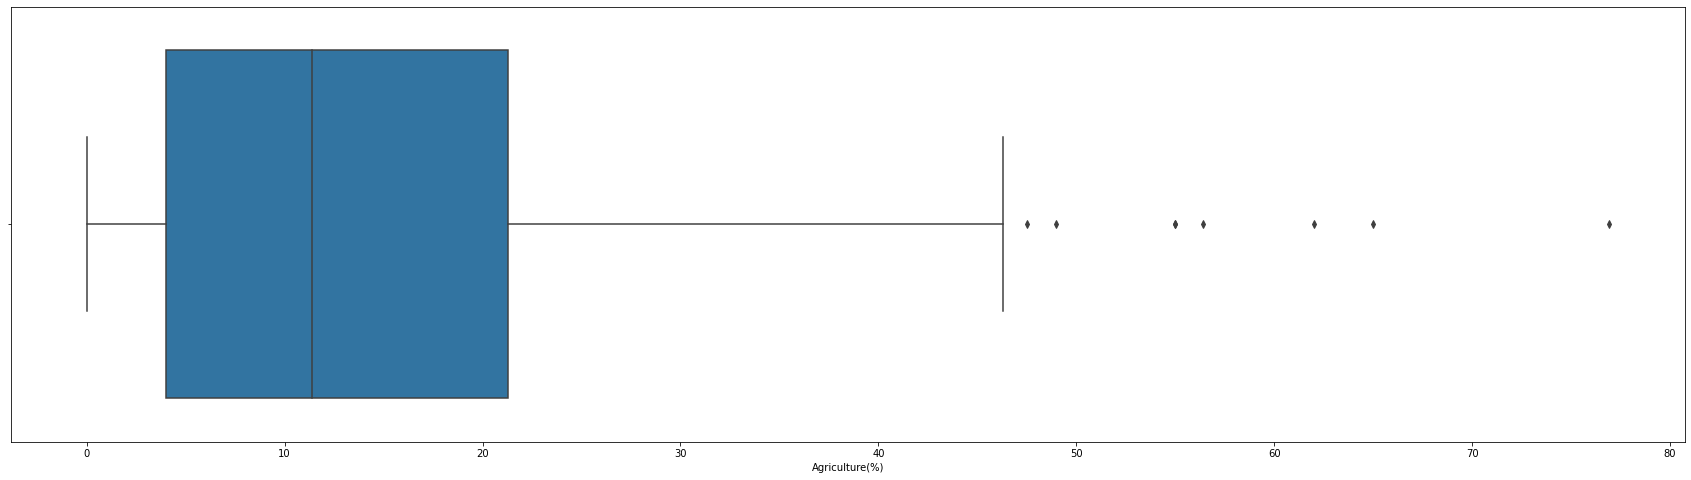

In [178]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['Agriculture(%)'])
plt.show()

In [179]:
df_copy[df_copy['Agriculture(%)']>60]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
87,Guinea-Bissau,SUB-SAHARAN AFRICA,1.44,36120.0,39.9,0.97,-1.57,107.17,800.0,42.4,7.4,10.67,8.82,80.51,37.22,16.53,62.0,12.0,26.0
117,Liberia,SUB-SAHARAN AFRICA,3.04,111370.0,27.3,0.52,0.00,128.87,1000.0,57.5,2.3,3.95,2.28,93.77,44.77,23.10,76.9,5.4,17.7
188,Somalia,SUB-SAHARAN AFRICA,8.86,637657.0,13.9,0.47,5.37,116.70,500.0,37.8,11.3,1.67,0.04,98.29,45.13,16.63,65.0,10.0,25.0


In [180]:
df_copy[df_copy['Agriculture(%)']>60]['Country'].tolist()

['Guinea-Bissau', 'Liberia', 'Somalia']

In [181]:
#Conclusion

#1. ['Guinea-Bissau', 'Liberia', 'Somalia'] these countries has high agriculture (%)

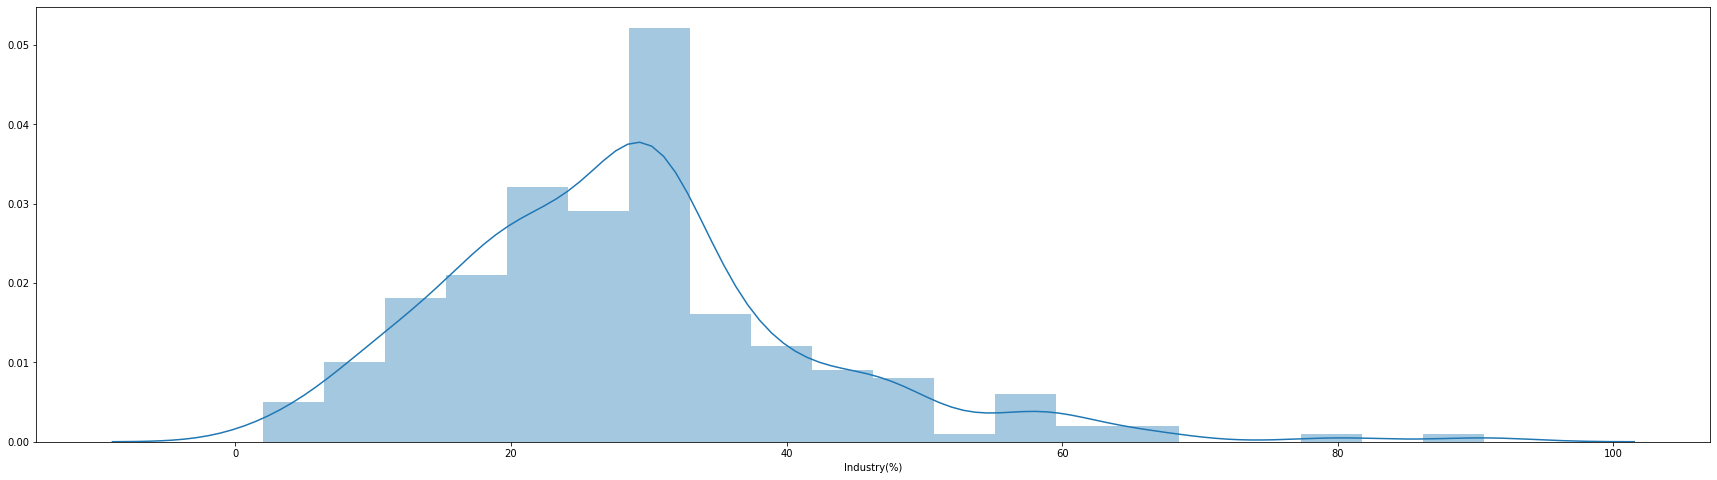

In [182]:
# for Industry(%) col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Industry(%)'])
plt.show()

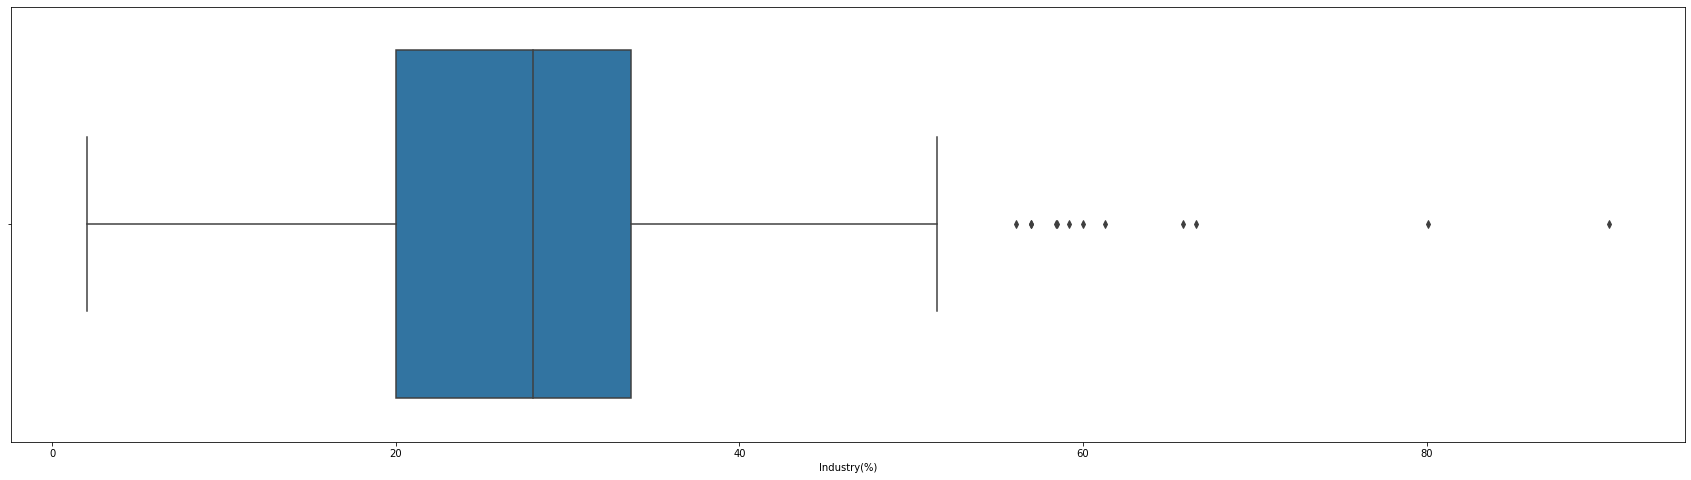

In [183]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['Industry(%)'])
plt.show()

In [184]:
df_copy[df_copy['Industry(%)']>80]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
62,Equatorial Guinea,SUB-SAHARAN AFRICA,0.54,28051.0,19.3,1.06,0.00,85.13,2700.0,85.7,18.5,4.63,3.57,91.80,35.59,15.06,3.0,90.6,6.2
166,Qatar,NEAR EAST,0.89,11437.0,77.4,4.92,16.29,18.61,21500.0,82.5,232.0,1.64,0.27,98.09,15.56,4.72,0.2,80.1,19.7


In [185]:
df_copy[df_copy['Industry(%)']>80]['Country'].tolist()

['Equatorial Guinea', 'Qatar']

In [186]:
#Conclusion

#1. ['Equatorial Guinea', 'Qatar'] these countries has higher Industry(%)

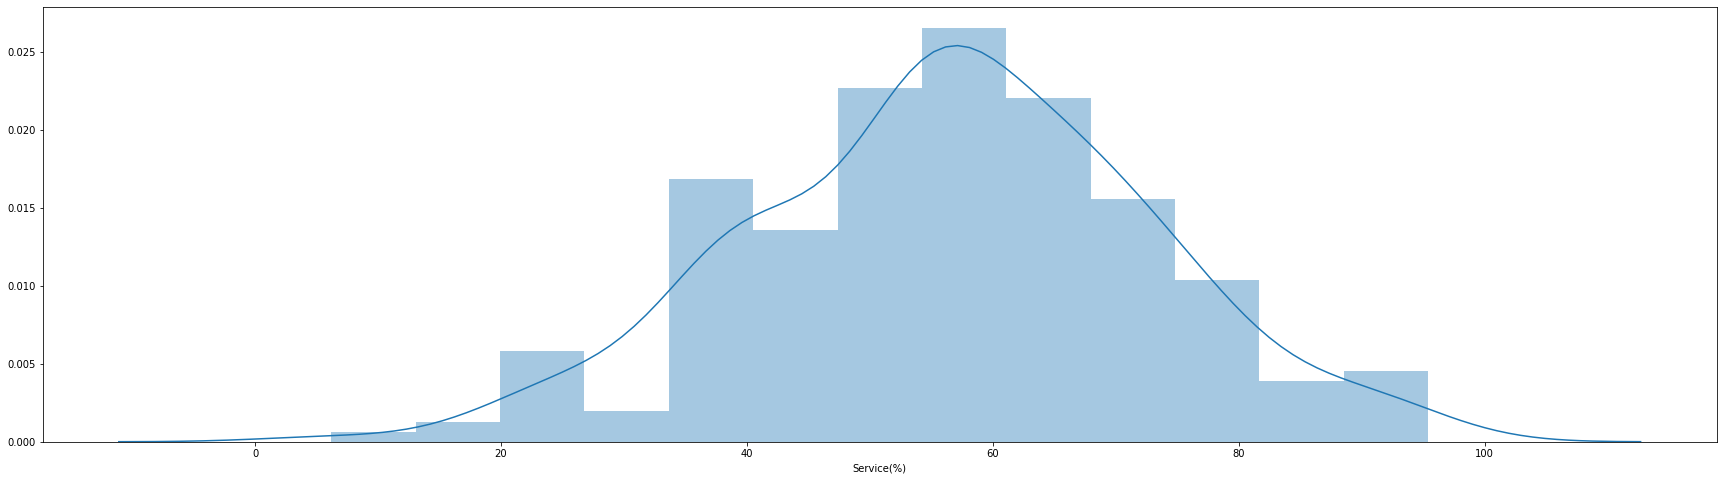

In [187]:
# for Service(%) col

plt.figure(figsize=(30,8))
sns.distplot(df_copy['Service(%)'])
plt.show()

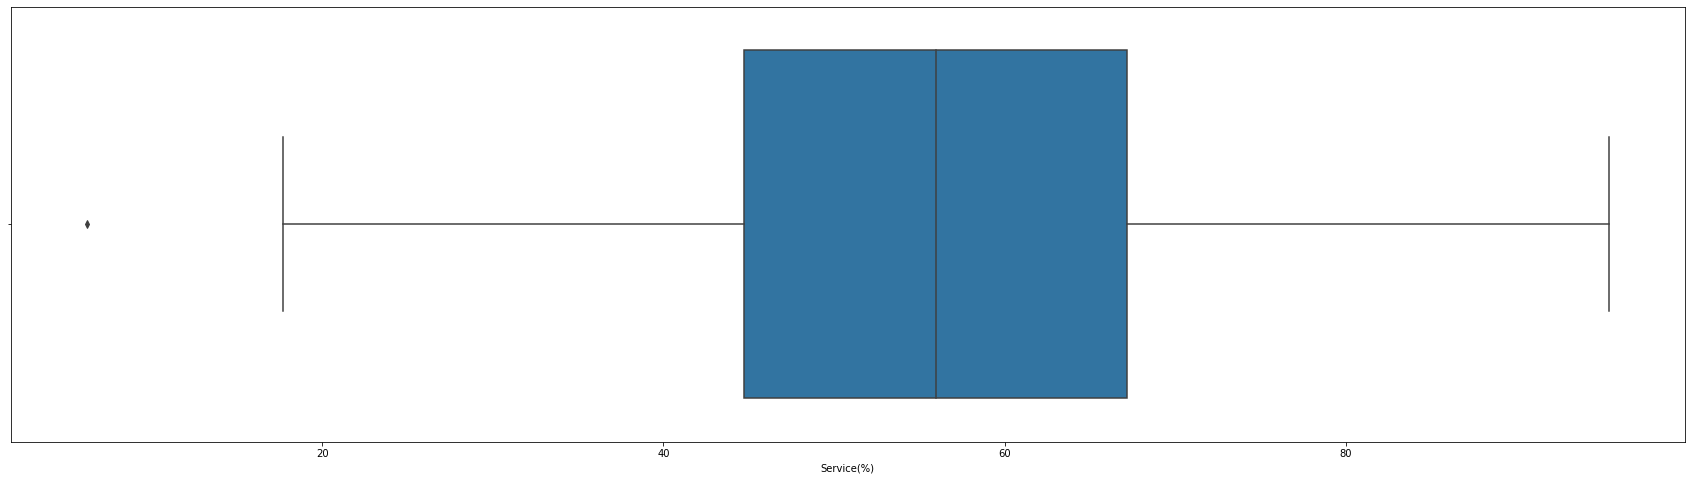

In [188]:
plt.figure(figsize=(30,8))
sns.boxplot(df_copy['Service(%)'])
plt.show()

In [189]:
df_copy[df_copy['Service(%)']<20]

,Country,Region,Population(million),Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Birth Rate,Death Rate,Agriculture(%),Industry(%),Service(%)
62,Equatorial Guinea,SUB-SAHARAN AFRICA,0.54,28051.0,19.3,1.06,0.00,85.13,2700.0,85.7,18.5,4.63,3.57,91.80,35.59,15.06,3.0,90.6,6.2
117,Liberia,SUB-SAHARAN AFRICA,3.04,111370.0,27.3,0.52,0.00,128.87,1000.0,57.5,2.3,3.95,2.28,93.77,44.77,23.10,76.9,5.4,17.7
166,Qatar,NEAR EAST,0.89,11437.0,77.4,4.92,16.29,18.61,21500.0,82.5,232.0,1.64,0.27,98.09,15.56,4.72,0.2,80.1,19.7


In [190]:
df_copy[df_copy['Service(%)']<20]['Country'].tolist()

['Equatorial Guinea', 'Liberia', 'Qatar']

In [191]:
#Conclusion

#1. ['Equatorial Guinea', 'Liberia', 'Qatar'] these countries has higher service (%)

# Conclusions after univariate analysis are :-

1. sub saharan region has most countries
2. balitics region has least countries 
3. China and India are outliers in popiulation col because they have a big population 
4. Hong Kong, Macau, Monaco, Singapore has high population density (per sq. mi.)
5. Russia is outlier, it has a big area per square mil.
6. Cook Islands has high Net Migration rate
7. Micronesia, Fed. St. has a big coastline
8. Cook Islands has high Net Migration rate 
9. Afghanistan, Angola has high Infant mortality (per 1000 births)
10. Luxembourg is an outlier, clearly it has a very high gdp but can hamper mathematical calcutions
11. ['Afghanistan', 'Burkina Faso', 'Guinea', 'Niger', 'Sierra Leone', 'Somalia'] - countries has a very low literary(%)
12. In Monaco the usage of phone is very high
13. ['Bangladesh', 'Denmark', 'Hungary', 'India', 'Moldova', 'Ukraine'] - these countries has a high Arable (%)
14. ['Kiribati', 'Marshall Islands', 'Micronesia, Fed. St.', 'Sao Tome & Principe', 'Tonga'] - these countries has a high Crops(%)
15. ['Botswana', 'Lesotho', 'Swaziland'] these countries has a high death rate than others
16. ['Guinea-Bissau', 'Liberia', 'Somalia'] these countries has high agriculture (%)
17. ['Equatorial Guinea', 'Liberia', 'Qatar'] these countries has higher service (%)
18. ['Equatorial Guinea', 'Qatar'] these countries has higher Industry(%)

**Multivariate Analysis**

In [210]:
#Rich Countries 

In [208]:
rich=df_copy['GDP ($ per capita)'].quantile(.75)
rich

15700.0

In [211]:
poor=df_copy['GDP ($ per capita)'].quantile(.25)
poor

1900.0

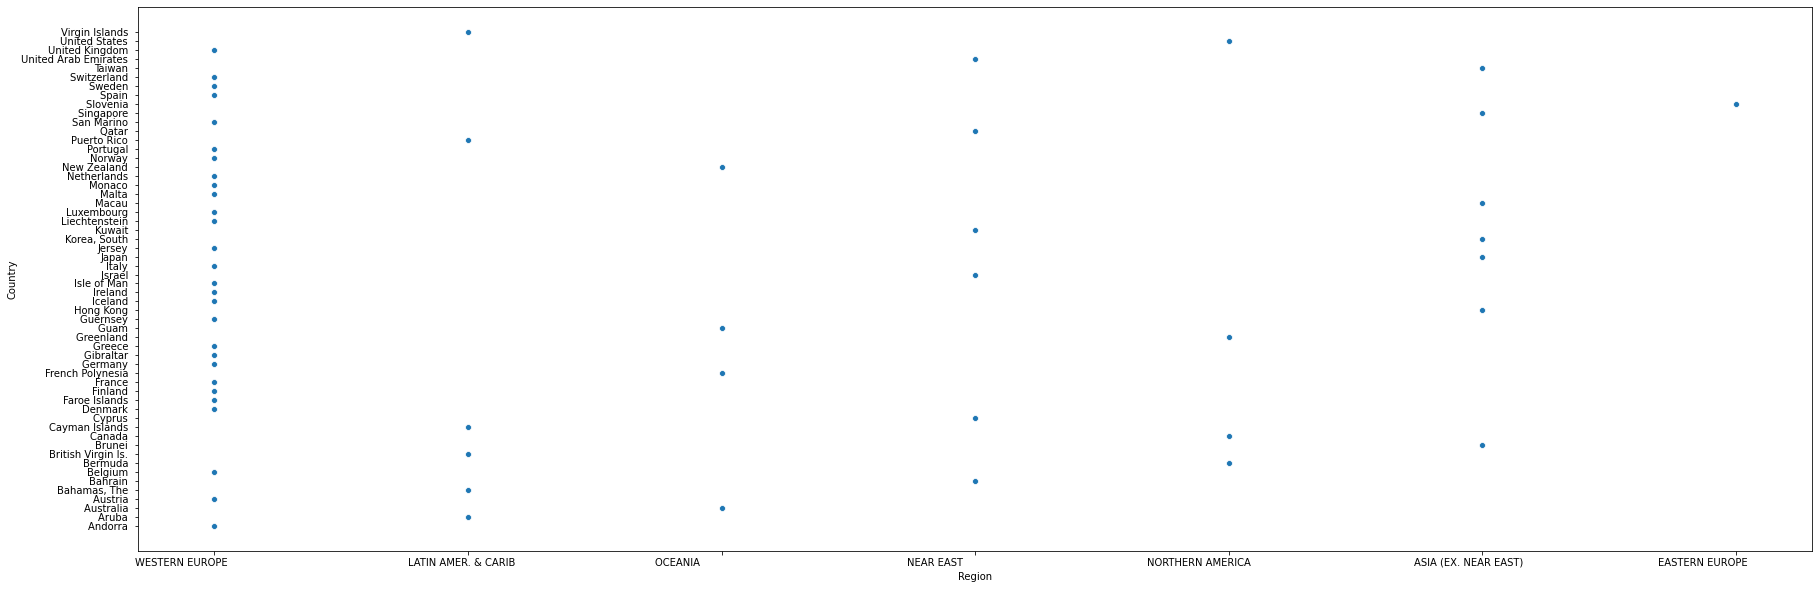

In [209]:
plt.figure(figsize=(30,10))
x=df_copy[df_copy['GDP ($ per capita)']>rich]['Region']
sns.scatterplot(x, y=df['Country'])

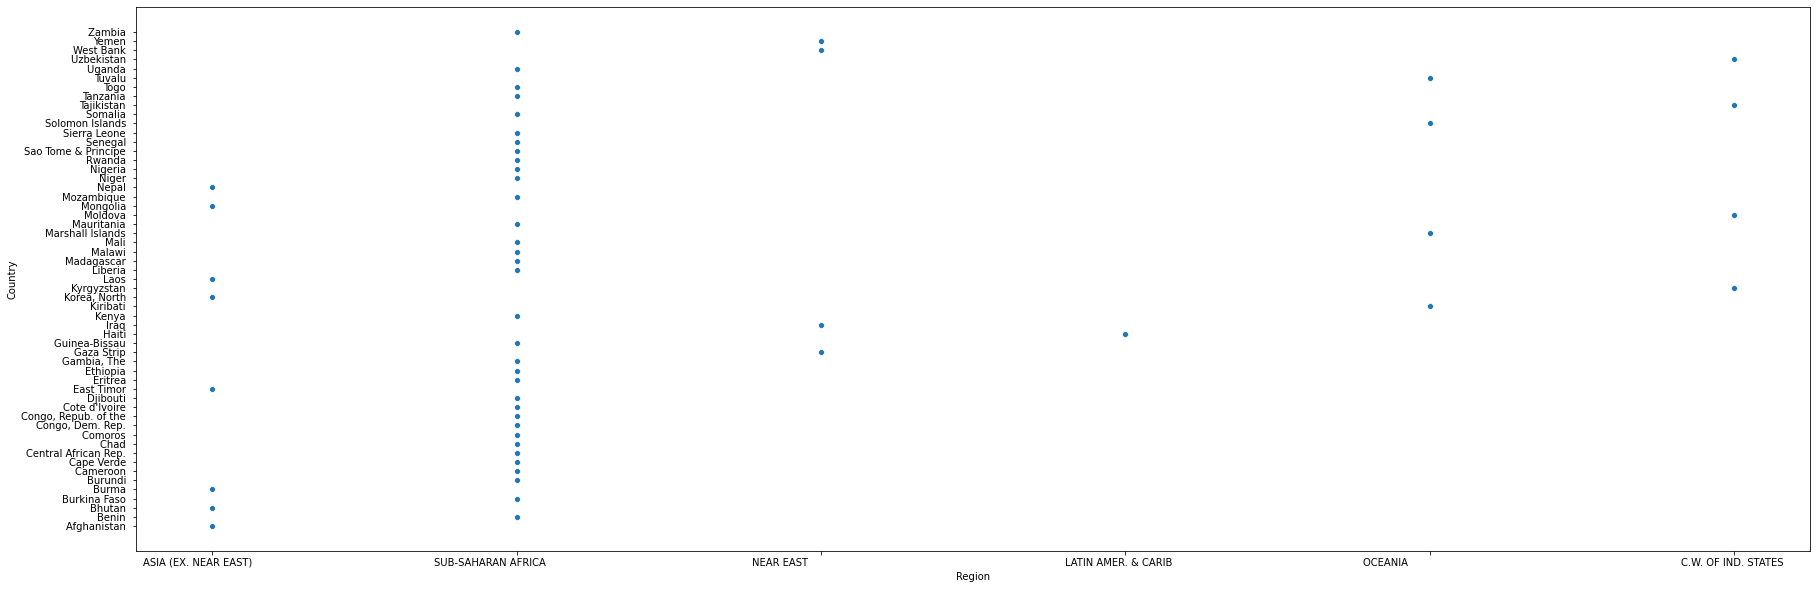

In [212]:
plt.figure(figsize=(30,10))
x=df_copy[df_copy['GDP ($ per capita)']<poor]['Region']
sns.scatterplot(x, y=df['Country'])

In [213]:
#Conclusion

#1. Western Europe has most of the richest countries in the world 
#2. Sub-Saharan Africa has the most poor countries in the world

In [218]:
df_copy.columns.values

array(['Country', 'Region', 'Population(million)', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birth Rate', 'Death Rate',
       'Agriculture(%)', 'Industry(%)', 'Service(%)'], dtype=object)

In [230]:
#About More Literate Countries

In [219]:
df_copy['Literacy (%)'].mean()

82.99644444444446

In [223]:
more_literate=df_copy[df_copy['Literacy (%)']>df_copy['Literacy (%)'].mean()][['Country','Literacy (%)','Industry(%)']]
less_literate=df_copy[df_copy['Literacy (%)']<df_copy['Literacy (%)'].mean()][['Country','Literacy (%)','Industry(%)']]

In [224]:
more_literate

,Country,Literacy (%),Industry(%)
1,Albania,86.5,18.8
3,American Samoa,97.0,30.7
4,Andorra,100.0,30.7
6,Anguilla,95.0,18.0
7,Antigua & Barbuda,89.0,22.0
...,...,...,...
218,Venezuela,93.4,41.9
219,Vietnam,90.3,41.0
220,Virgin Islands,83.0,19.0
222,West Bank,83.0,28.0


In [225]:
less_literate

,Country,Literacy (%),Industry(%)
0,Afghanistan,36.0,24.0
2,Algeria,70.0,60.0
5,Angola,42.0,65.8
16,Bangladesh,43.1,19.8
21,Benin,40.9,13.8
...,...,...,...
210,Uganda,69.9,22.2
212,United Arab Emirates,77.9,58.5
217,Vanuatu,53.0,12.0
224,Yemen,50.2,47.2


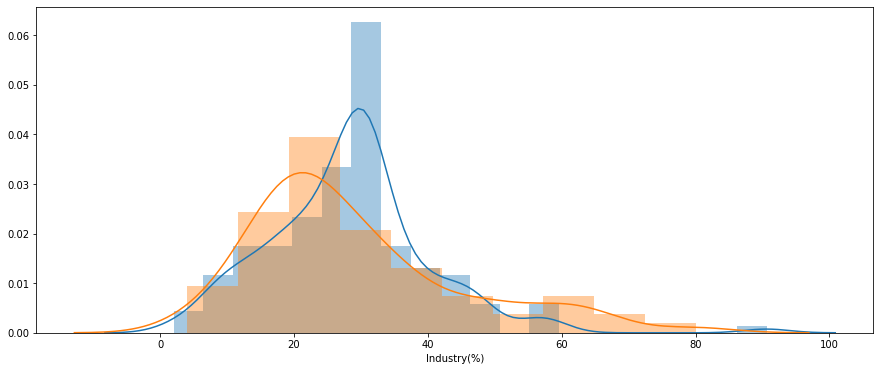

In [229]:
plt.figure(figsize=(15,6))
sns.distplot(df_copy[df_copy['Literacy (%)']>df_copy['Literacy (%)'].mean()]['Industry(%)'])
sns.distplot(df_copy[df_copy['Literacy (%)']<df_copy['Literacy (%)'].mean()]['Industry(%)'])

In [ ]:
#Conclusion 

#1. The countries with more literacy(%) has higher industry(%)

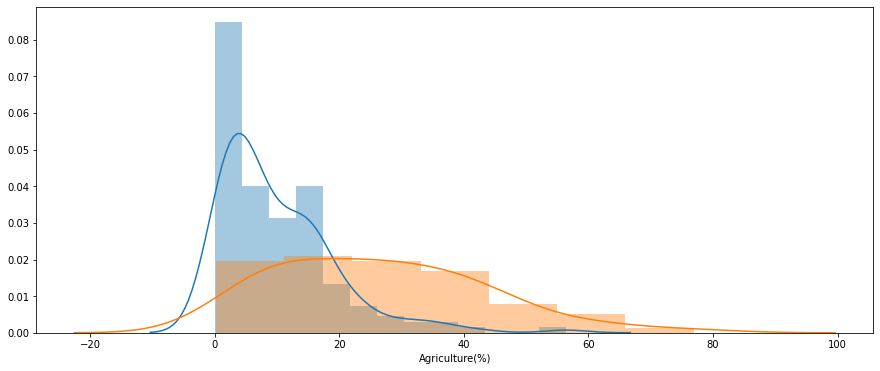

In [231]:
plt.figure(figsize=(15,6))
sns.distplot(df_copy[df_copy['Literacy (%)']>df_copy['Literacy (%)'].mean()]['Agriculture(%)'])
sns.distplot(df_copy[df_copy['Literacy (%)']<df_copy['Literacy (%)'].mean()]['Agriculture(%)'])

In [232]:
#conclusion 

#1. Countries which are little lagging behind in literacy(%) has more Agriculture(%)

# Few conclusions after Multivariate analysis

1. Western Europe has most of the richest countries in the world 
2. Sub-Saharan Africa has the most poor countries in the world
3. The countries with more literacy(%) has higher industry(%)
4. Countries which are little lagging behind in literacy(%) has more Agriculture(%)